<a href="https://colab.research.google.com/github/nswathi3421/excelr-datascience-assignments/blob/master/MICROSOFT_STOCK_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MICROSOFT STOCK PRICE PREDICTION

### Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Reading the file

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df = pd.read_csv('/content/sample_data/MSFT.csv')

In [ ]:
df

Date        Open        High         Low       Close   Adj Close  \
0     2004-03-04   26.330000   26.420000   26.209999   26.370001   16.462585   
1     2004-03-05   26.230000   26.600000   26.200001   26.350000   16.450094   
2     2004-03-08   26.309999   26.350000   25.809999   25.830000   16.125462   
3     2004-03-09   25.799999   25.969999   25.540001   25.719999   16.056793   
4     2004-03-10   25.650000   25.799999   25.350000   25.370001   15.838284   
...          ...         ...         ...         ...         ...         ...   
5028  2024-02-26  411.459991  412.160004  407.359985  407.540009  407.540009   
5029  2024-02-27  407.989990  408.320007  403.850006  407.480011  407.480011   
5030  2024-02-28  408.179993  409.299988  405.320007  407.720001  407.720001   
5031  2024-02-29  408.640015  414.200012  405.920013  413.640015  413.640015   
5032  2024-03-01  411.269989  415.869995  410.880005  415.500000  415.500000   

        Volume  
0     44023200  
1     59849800  
2     69367800  
3     81111700  
4     75155800  
...        ...  
5028  16193500  
5029  14835800  
5030  13183100  
5031  31947300  
5032  17800300  

[5033 rows x 7 columns]

In [ ]:
df.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  2004-03-04  26.330000  26.420000  26.209999  26.370001  16.462585  44023200
1  2004-03-05  26.230000  26.600000  26.200001  26.350000  16.450094  59849800
2  2004-03-08  26.309999  26.350000  25.809999  25.830000  16.125462  69367800
3  2004-03-09  25.799999  25.969999  25.540001  25.719999  16.056793  81111700
4  2004-03-10  25.650000  25.799999  25.350000  25.370001  15.838284  75155800

In [ ]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
5028  2024-02-26  411.459991  412.160004  407.359985  407.540009  407.540009   
5029  2024-02-27  407.989990  408.320007  403.850006  407.480011  407.480011   
5030  2024-02-28  408.179993  409.299988  405.320007  407.720001  407.720001   
5031  2024-02-29  408.640015  414.200012  405.920013  413.640015  413.640015   
5032  2024-03-01  411.269989  415.869995  410.880005  415.500000  415.500000   

        Volume  
5028  16193500  
5029  14835800  
5030  13183100  
5031  31947300  
5032  17800300

In [ ]:
df.shape

(5033, 7)

# EDA(Exploratory Data Analysis)

In [ ]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  5033.000000  5033.000000  5033.000000  5033.000000  5033.000000   
mean     91.724749    92.629517    90.805285    91.758005    85.651004   
std      98.353518    99.332872    97.340752    98.394678    99.396238   
min      15.200000    15.620000    14.870000    15.150000    11.283752   
25%      27.340000    27.580000    27.150000    27.360001    20.260439   
50%      38.139999    38.450001    37.860001    38.160000    32.220924   
75%     114.190002   114.910004   113.680000   114.370003   107.976402   
max     420.559998   420.820007   415.089996   420.549988   419.773712   

             Volume  
count  5.033000e+03  
mean   4.629183e+07  
std    2.869848e+07  
min    7.425600e+06  
25%    2.631660e+07  
50%    3.945980e+07  
75%    5.852800e+07  
max    5.910522e+08

In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5033 non-null   object 
 1   Open       5033 non-null   float64
 2   High       5033 non-null   float64
 3   Low        5033 non-null   float64
 4   Close      5033 non-null   float64
 5   Adj Close  5033 non-null   float64
 6   Volume     5033 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 275.4+ KB


In [ ]:
df.nunique()

Date         5033
Open         3475
High         3435
Low          3451
Close        3451
Adj Close    4686
Volume       5014
dtype: int64

date column we have 5033 means there are no repited dates in date column. It returns the number of unique elements in each column of the DataFrame.

##### Here we Changing Object Data type  to Datetime

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5033 non-null   datetime64[ns]
 1   Open       5033 non-null   float64       
 2   High       5033 non-null   float64       
 3   Low        5033 non-null   float64       
 4   Close      5033 non-null   float64       
 5   Adj Close  5033 non-null   float64       
 6   Volume     5033 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 275.4 KB


In [ ]:
df.index = df.pop('Date')
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-03-04   26.330000   26.420000   26.209999   26.370001   16.462585   
2004-03-05   26.230000   26.600000   26.200001   26.350000   16.450094   
2004-03-08   26.309999   26.350000   25.809999   25.830000   16.125462   
2004-03-09   25.799999   25.969999   25.540001   25.719999   16.056793   
2004-03-10   25.650000   25.799999   25.350000   25.370001   15.838284   
...                ...         ...         ...         ...         ...   
2024-02-26  411.459991  412.160004  407.359985  407.540009  407.540009   
2024-02-27  407.989990  408.320007  403.850006  407.480011  407.480011   
2024-02-28  408.179993  409.299988  405.320007  407.720001  407.720001   
2024-02-29  408.640015  414.200012  405.920013  413.640015  413.640015   
2024-03-01  411.269989  415.869995  410.880005  415.500000  415.500000   

              Volume  
Date                  
2004-03-04  44023200  
2004-03-05  59849800  
2004-03-08  69367800  
2004-03-09  81111700  
2004-03-10  75155800  
...              ...  
2024-02-26  16193500  
2024-02-27  14835800  
2024-02-28  13183100  
2024-02-29  31947300  
2024-03-01  17800300  

[5033 rows x 6 columns]

this function performs two operations  that is it extracts the 'Date' column from the DataFrame and removes it from df.
he index is a way to uniquely identify each row in a DataFrame

In [ ]:
maxim = df['Close'].max()
minim = df['Close'].min()
print(maxim  , minim)

420.549988 15.15


#### missing values detection

In [ ]:
df.isna()

Open   High    Low  Close  Adj Close  Volume
Date                                                     
2004-03-04  False  False  False  False      False   False
2004-03-05  False  False  False  False      False   False
2004-03-08  False  False  False  False      False   False
2004-03-09  False  False  False  False      False   False
2004-03-10  False  False  False  False      False   False
...           ...    ...    ...    ...        ...     ...
2024-02-26  False  False  False  False      False   False
2024-02-27  False  False  False  False      False   False
2024-02-28  False  False  False  False      False   False
2024-02-29  False  False  False  False      False   False
2024-03-01  False  False  False  False      False   False

[5033 rows x 6 columns]

Here we can see there are false values so it means there is no null values present in dataset

In [ ]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

 it calculates the sum of values along the specified axis

### Duplicated records

In [ ]:
df.duplicated()

Date
2004-03-04    False
2004-03-05    False
2004-03-08    False
2004-03-09    False
2004-03-10    False
              ...  
2024-02-26    False
2024-02-27    False
2024-02-28    False
2024-02-29    False
2024-03-01    False
Length: 5033, dtype: bool

# Data Visualization

#### we have used some Graphical methods like Histogram, Boxplot, Correlation matrix heatmap and Time series plot

### Histogram and frequency distribution

Text(0, 0.5, 'Frequency')

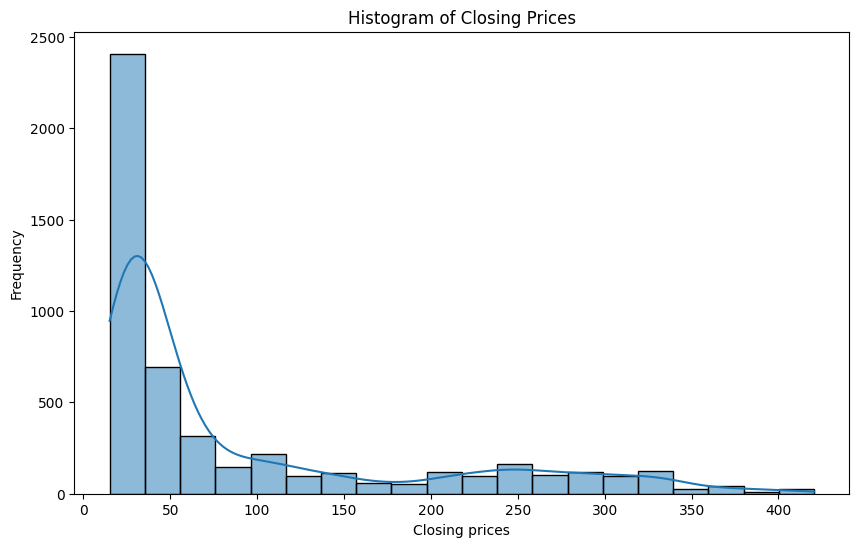

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Close'], bins=20, kde=True)
plt.title('Histogram of Closing Prices')
plt.xlabel('Closing prices')
plt.ylabel('Frequency')

### Observation:

This above plot show that it is positively skewed to the right side
This graph is representation of the frequency distribution of closing prices, showing how often different price ranges occur in the data. The histogram bars represent the counts or frequencies of data points falling within each bin, while the KDE curve provides a smoothed estimate of the underlying distribution of the data.


### Density Plot

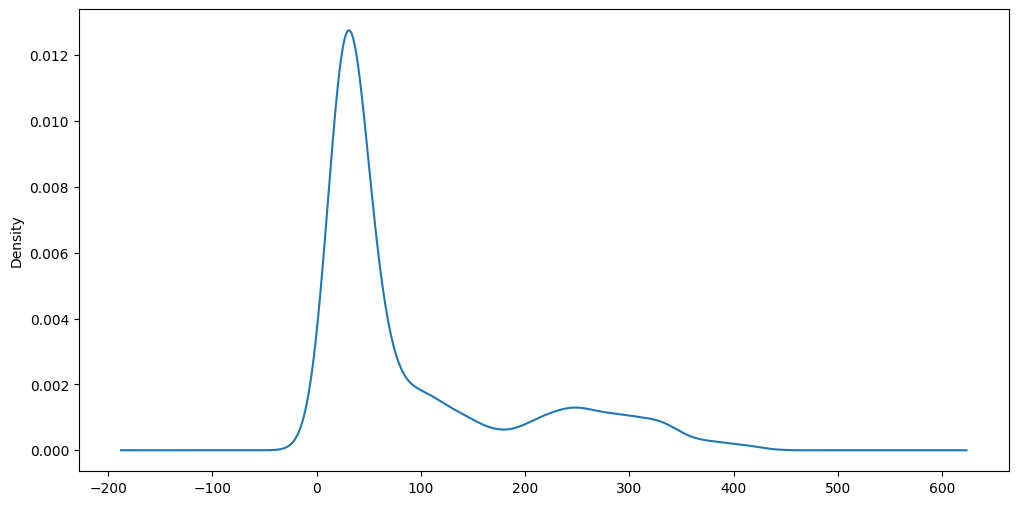

In [ ]:
df.Close.plot(kind='kde', figsize=(12,6))
plt.show()

#### Observation

this above graph we can see that there is a right skewednessis present  towards the tail
it shows therepresentation of the density or distribution of 'Close' prices. It shows how the data is spread out across different price levels, giving insight into the concentration of prices and potential peaks or clusters in the data.

# Line plot

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

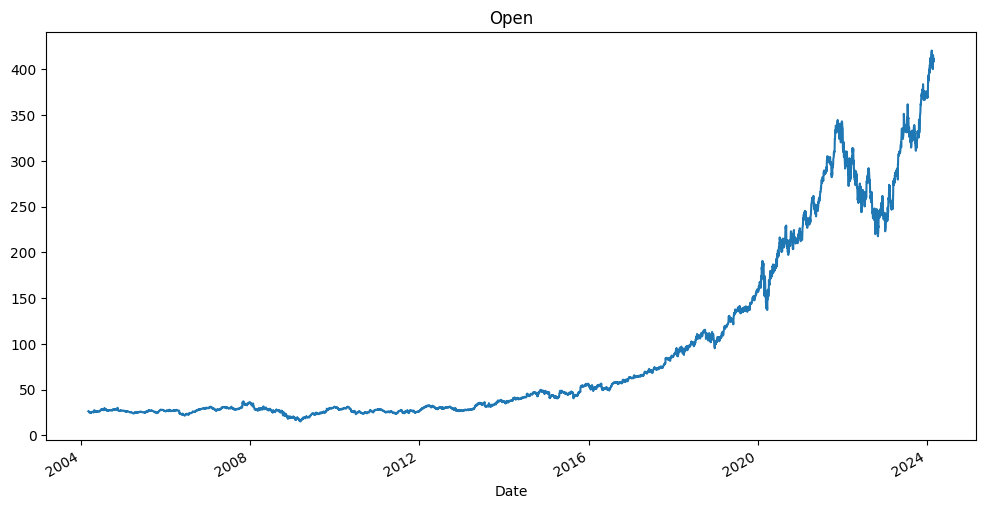

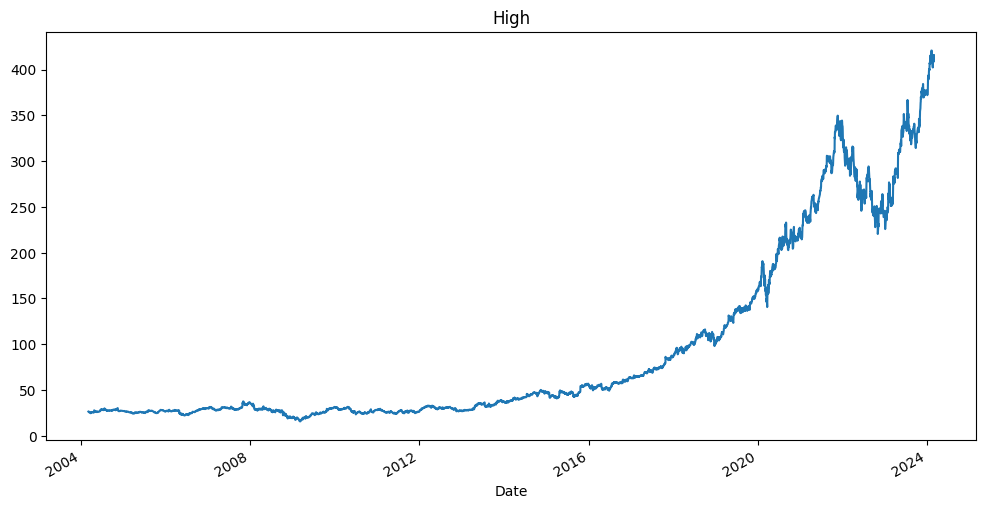

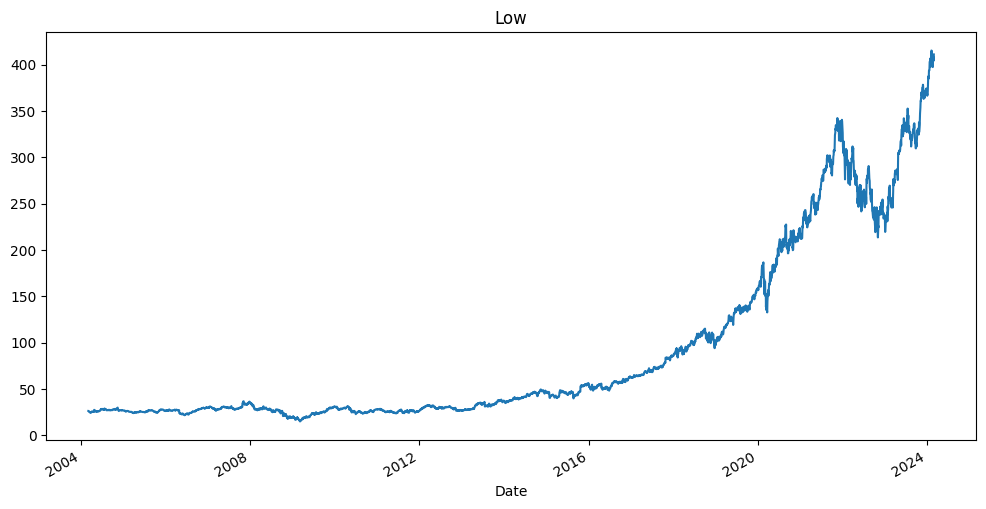

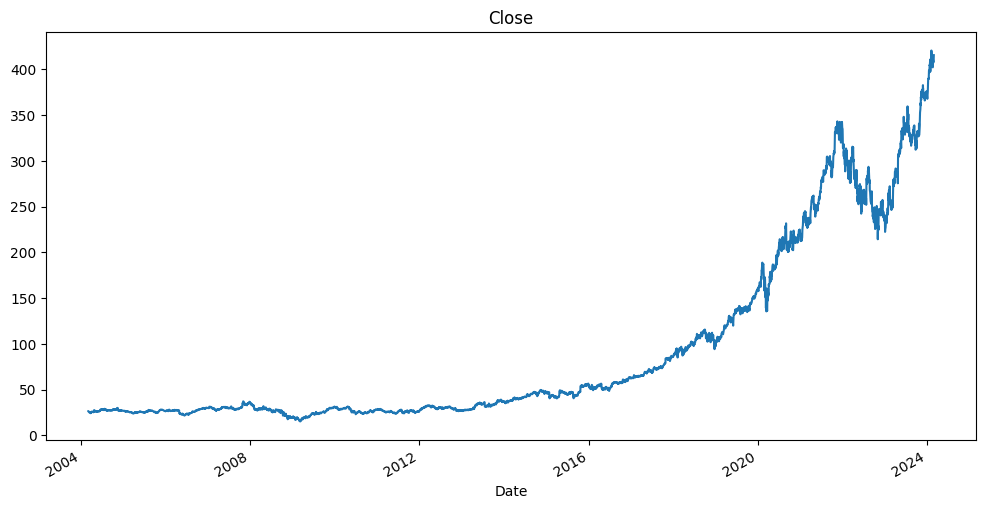

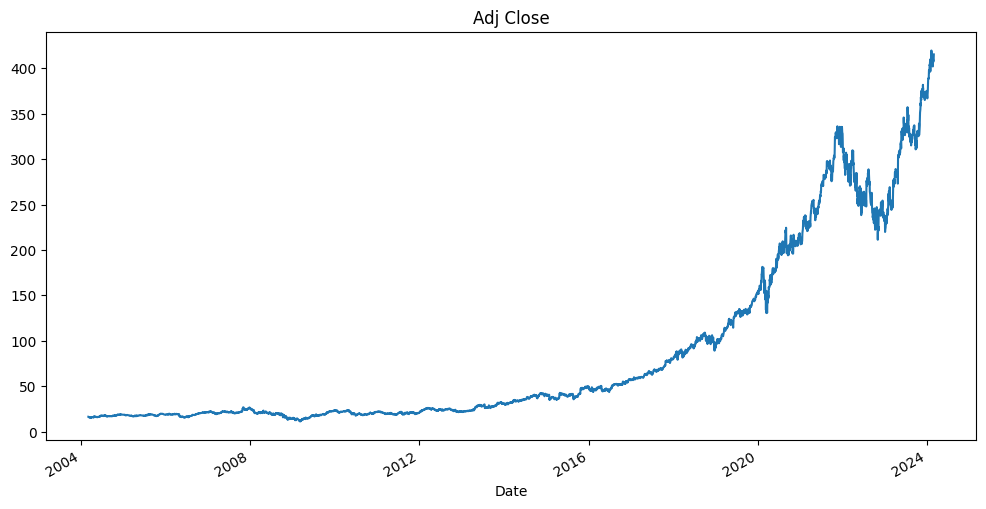

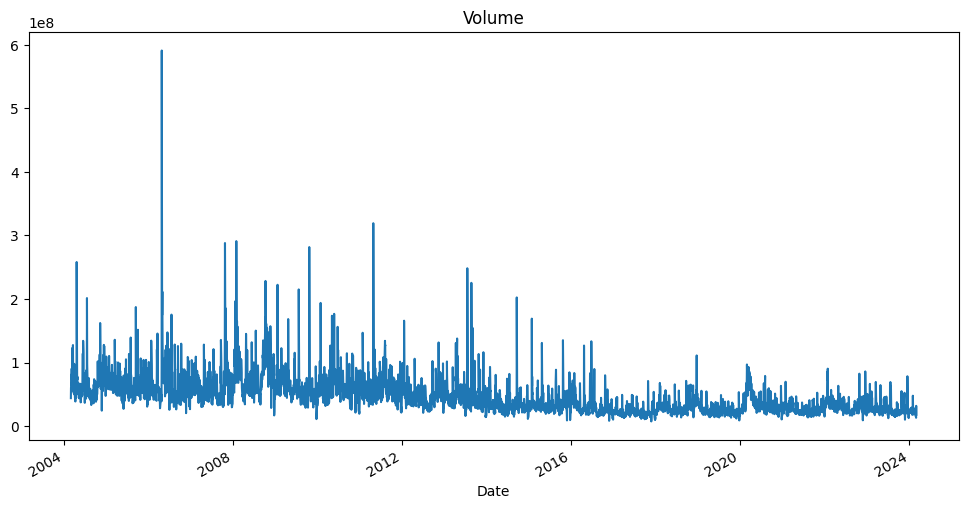

In [ ]:
for i in df.columns:
    df[i].plot(figsize = (12,6))
    plt.title(i)
    plt.show()

#### Observation
(for High,Low,Close,Adj Close)

* The data is not changing much for the time period of 2004 to 2014. The major changes occured from 2014 to 2024.
* and then it suddenly get increased from 2014 to 2424
#### Conclusion:
* But for the volume the price of this stock incresed significantly the volume decresed over time.

#### Closer look at the time period of 2014 to 2024

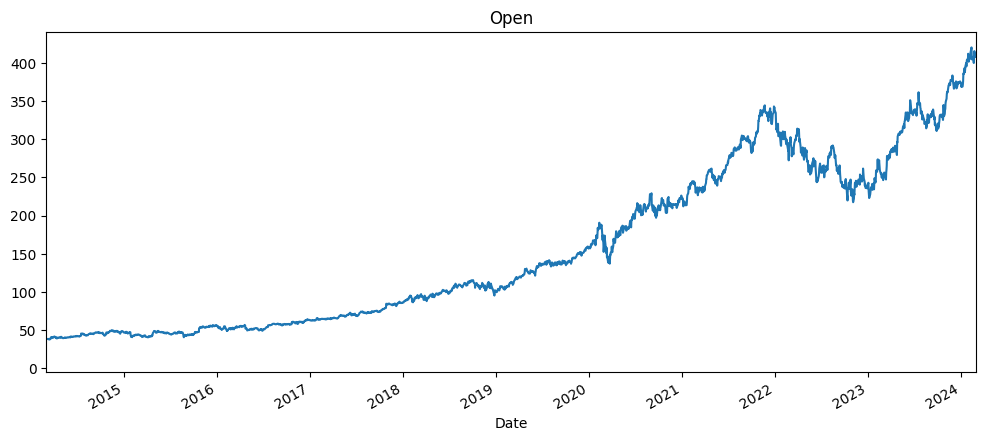

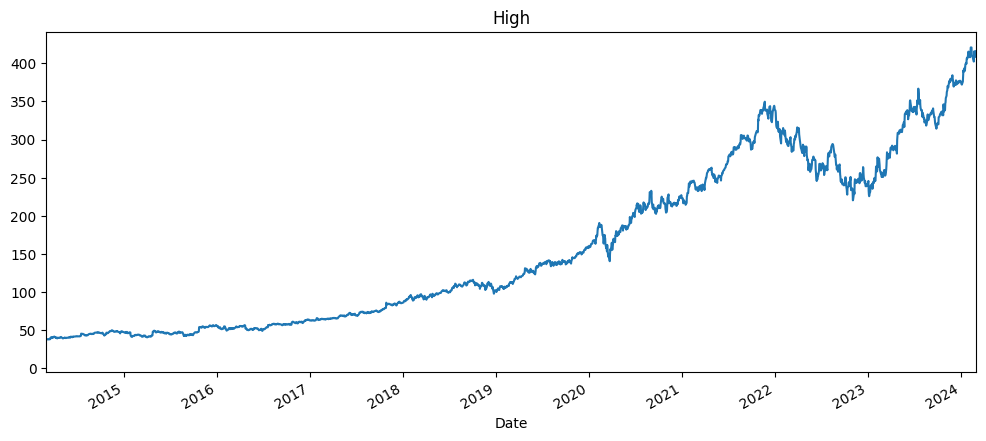

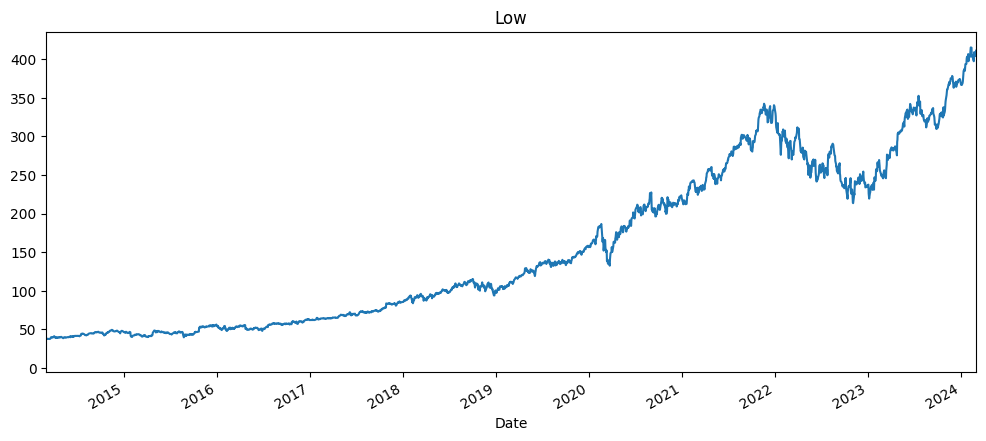

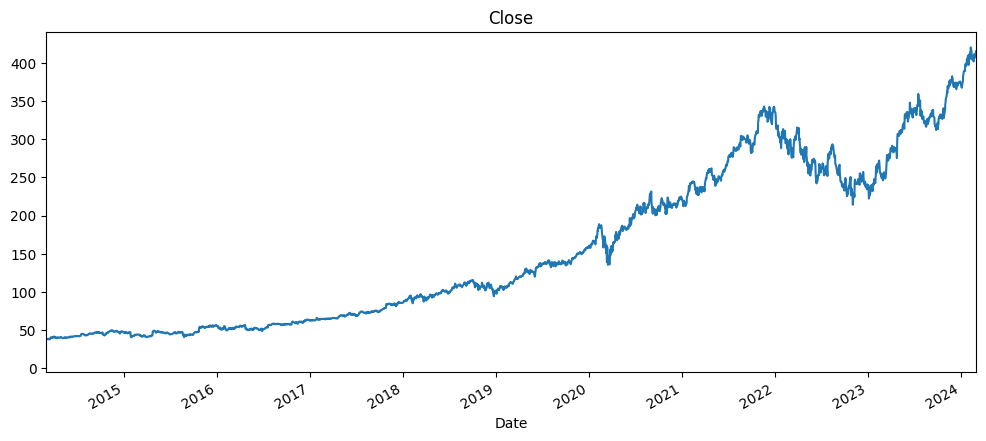

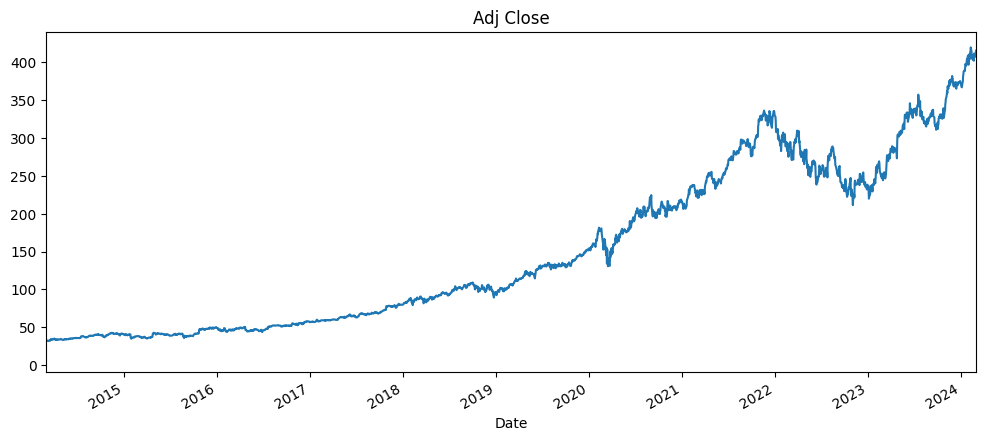

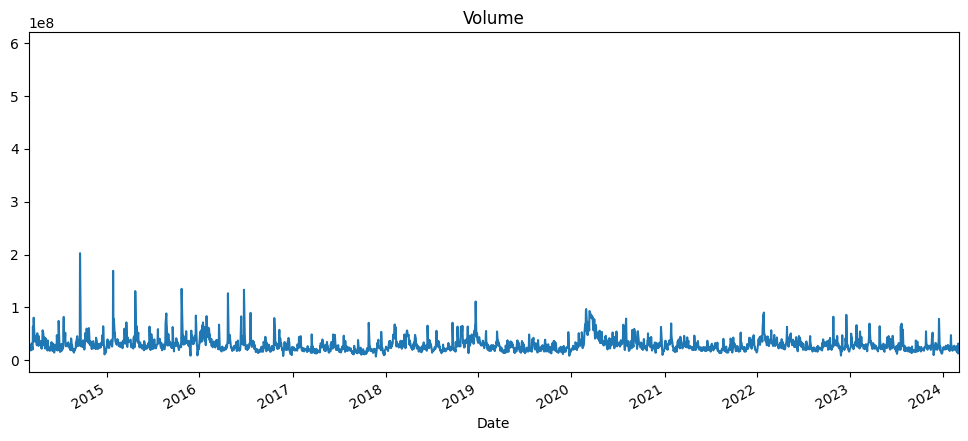

In [ ]:
for i in df.columns:
    df[i].plot(figsize = (12,5), xlim= ['2014-03-01', '2024-03-01'])
    plt.title(i)
    plt.show()

#### extractating  year and month out of the index of the data.

In [ ]:
df1 = df.copy()

In [ ]:
df1.reset_index(inplace = True)

In [ ]:
df1.head()

Date       Open       High        Low      Close  Adj Close    Volume
0 2004-03-04  26.330000  26.420000  26.209999  26.370001  16.462585  44023200
1 2004-03-05  26.230000  26.600000  26.200001  26.350000  16.450094  59849800
2 2004-03-08  26.309999  26.350000  25.809999  25.830000  16.125462  69367800
3 2004-03-09  25.799999  25.969999  25.540001  25.719999  16.056793  81111700
4 2004-03-10  25.650000  25.799999  25.350000  25.370001  15.838284  75155800

### Feature engineering

In [ ]:
# Convert 'Date' column to datetime
df1['Date'] = pd.to_datetime(df1['Date'], format='%b-%y')

# Extract month and year
df1['month'] = df1['Date'].dt.strftime('%b')
df1['year'] = df1['Date'].dt.strftime('%Y')

# Display the first 10 rows
print(df1.head(10))

        Date       Open       High        Low      Close  Adj Close    Volume  \
0 2004-03-04  26.330000  26.420000  26.209999  26.370001  16.462585  44023200   
1 2004-03-05  26.230000  26.600000  26.200001  26.350000  16.450094  59849800   
2 2004-03-08  26.309999  26.350000  25.809999  25.830000  16.125462  69367800   
3 2004-03-09  25.799999  25.969999  25.540001  25.719999  16.056793  81111700   
4 2004-03-10  25.650000  25.799999  25.350000  25.370001  15.838284  75155800   
5 2004-03-11  25.180000  25.780001  25.070000  25.090000  15.663484  90536300   
6 2004-03-12  25.379999  25.510000  25.230000  25.379999  15.844533  64137100   
7 2004-03-15  25.299999  25.430000  25.059999  25.160000  15.707184  68835300   
8 2004-03-16  25.260000  25.370001  25.100000  25.180000  15.719675  65453800   
9 2004-03-17  25.250000  25.459999  25.110001  25.129999  15.688459  56241400   

  month  year  
0   Mar  2004  
1   Mar  2004  
2   Mar  2004  
3   Mar  2004  
4   Mar  2004  
5   Mar  200

# Heatmap using pivote table

In [ ]:
for i in df.columns:
    plt.figure(figsize=(20,9))
    heatmap_y_month = pd.pivot_table(df1, values=i, index="year", columns="month", aggfunc="mean", fill_value=0)
    sns.heatmap(heatmap_y_month[['Jan', 'Feb', 'Mar', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']], annot=True, fmt="g")
    plt.title(i)
    plt.show()

#### Conclusion:(for  High,Low,Open,Close,AdjClose)
 * This provides a visual representation of how each variable varies across months and years.
 * we can see the increasing trend and the prices reached maximum values
 abd also for volume it different in trend


### Line plot for yearly highest values

In [ ]:
for i in df.columns:
    plt.figure(figsize=(22, 4))
    sns.lineplot(x="year", y=i, data=df1)
    plt.title(i)
    plt.show()

### Conclusion
* A title is set for each plot based on the column name. However, without data visualizations, it's challenging to illustrate specific trends or predictions for 2024.

* Here we can see an upward trend in 2024 because we still have just two months data though things are setting back it again we can expect it to fallow the upward trend, but the bottom line is it could go in either direction


### Boxplot for monthly and yearly data

In [ ]:
for i in df.columns:
    plt.figure(figsize=(28,8))
    plt.subplot(211)
    sns.boxplot(x="month", y=i, data=df1)
    plt.title(i+  "Month-wise ")
    plt.subplot(212)
    sns.boxplot(x="year", y=i, data=df1)
    plt.title(i+  "Year-wise ")
    plt.tight_layout()
    plt.show()

## Observation:

In the month-wise subplot, it utilizes seaborn's boxplot function to show the distribution of values of column i across different months.

This visualization allows for comparison of the distribution of values across months and years for each column, aiding in identifying any seasonal patterns or trends.


In [ ]:
#Bar plot for Average 'Open' price by Month
monthly_open_mean = df1.groupby('month')['Open'].mean()
plt.figure(figsize=(4,3))
monthly_open_mean.plot(kind='bar')
plt.title('Average Open Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Open Price')
plt.xticks(rotation=0)
plt.show()


#Bar plot for Average 'High' price by Month
monthly_high_mean = df1.groupby('month')['High'].mean()
plt.figure(figsize=(4,3))
monthly_high_mean.plot(kind='bar')
plt.title('Average High Price by Month')
plt.xlabel('Month')
plt.ylabel('Average High Price')
plt.xticks(rotation=0)
plt.show()


#Bar plot for Average 'Low' price by Month
monthly_low_mean = df1.groupby('month')['Low'].mean()
plt.figure(figsize=(4,3))
monthly_low_mean.plot(kind='bar')
plt.title('Average Low Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Low Price')
plt.xticks(rotation=0)
plt.show()


#Bar plot for Average 'Close' price by Month
monthly_close_mean = df1.groupby('month')['Close'].mean()
plt.figure(figsize=(4,3))
monthly_close_mean.plot(kind='bar')
plt.title('Average close Price by Month')
plt.xlabel('Month')
plt.ylabel('Average close Price')
plt.xticks(rotation=0)
plt.show()


#Bar plot for Average 'Adj Close' price by Month
monthly_adj_Close_mean = df1.groupby('month')['Adj Close'].mean()
plt.figure(figsize=(4,3))
monthly_adj_Close_mean.plot(kind='bar')
plt.title('Average Adj Close Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Adj Close Price')
plt.xticks(rotation=0)
plt.show()

#Bar plot for Average 'Volume' price by Month
monthly_volume_mean = df1.groupby('month')['Volume'].mean()
plt.figure(figsize=(4,3))
monthly_volume_mean.plot(kind='bar')
plt.title('Average Volume Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Volume Price')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Extract Quarter from Date
df1['Quarter'] = df1['Date'].dt.quarter

#pie chart for different quqrters
quarterly_data = df1.groupby('Quarter')['Close'].sum()
quarterly_data.plot(kind= 'pie', autopct = '%1.1f%%', startangle=90, figsize=(8,8))
plt.title("Stock Closing Price Distribution by Quarter")
plt.show()

#### Observation

creates a pie chart representing the distribution of stock closing prices across different quarters.
This visualization allows for a quick understanding of the proportion of closing prices contributed by each quarter, providing insights into quarterly performance trends.

In [ ]:
df1.head()

# Pairplot

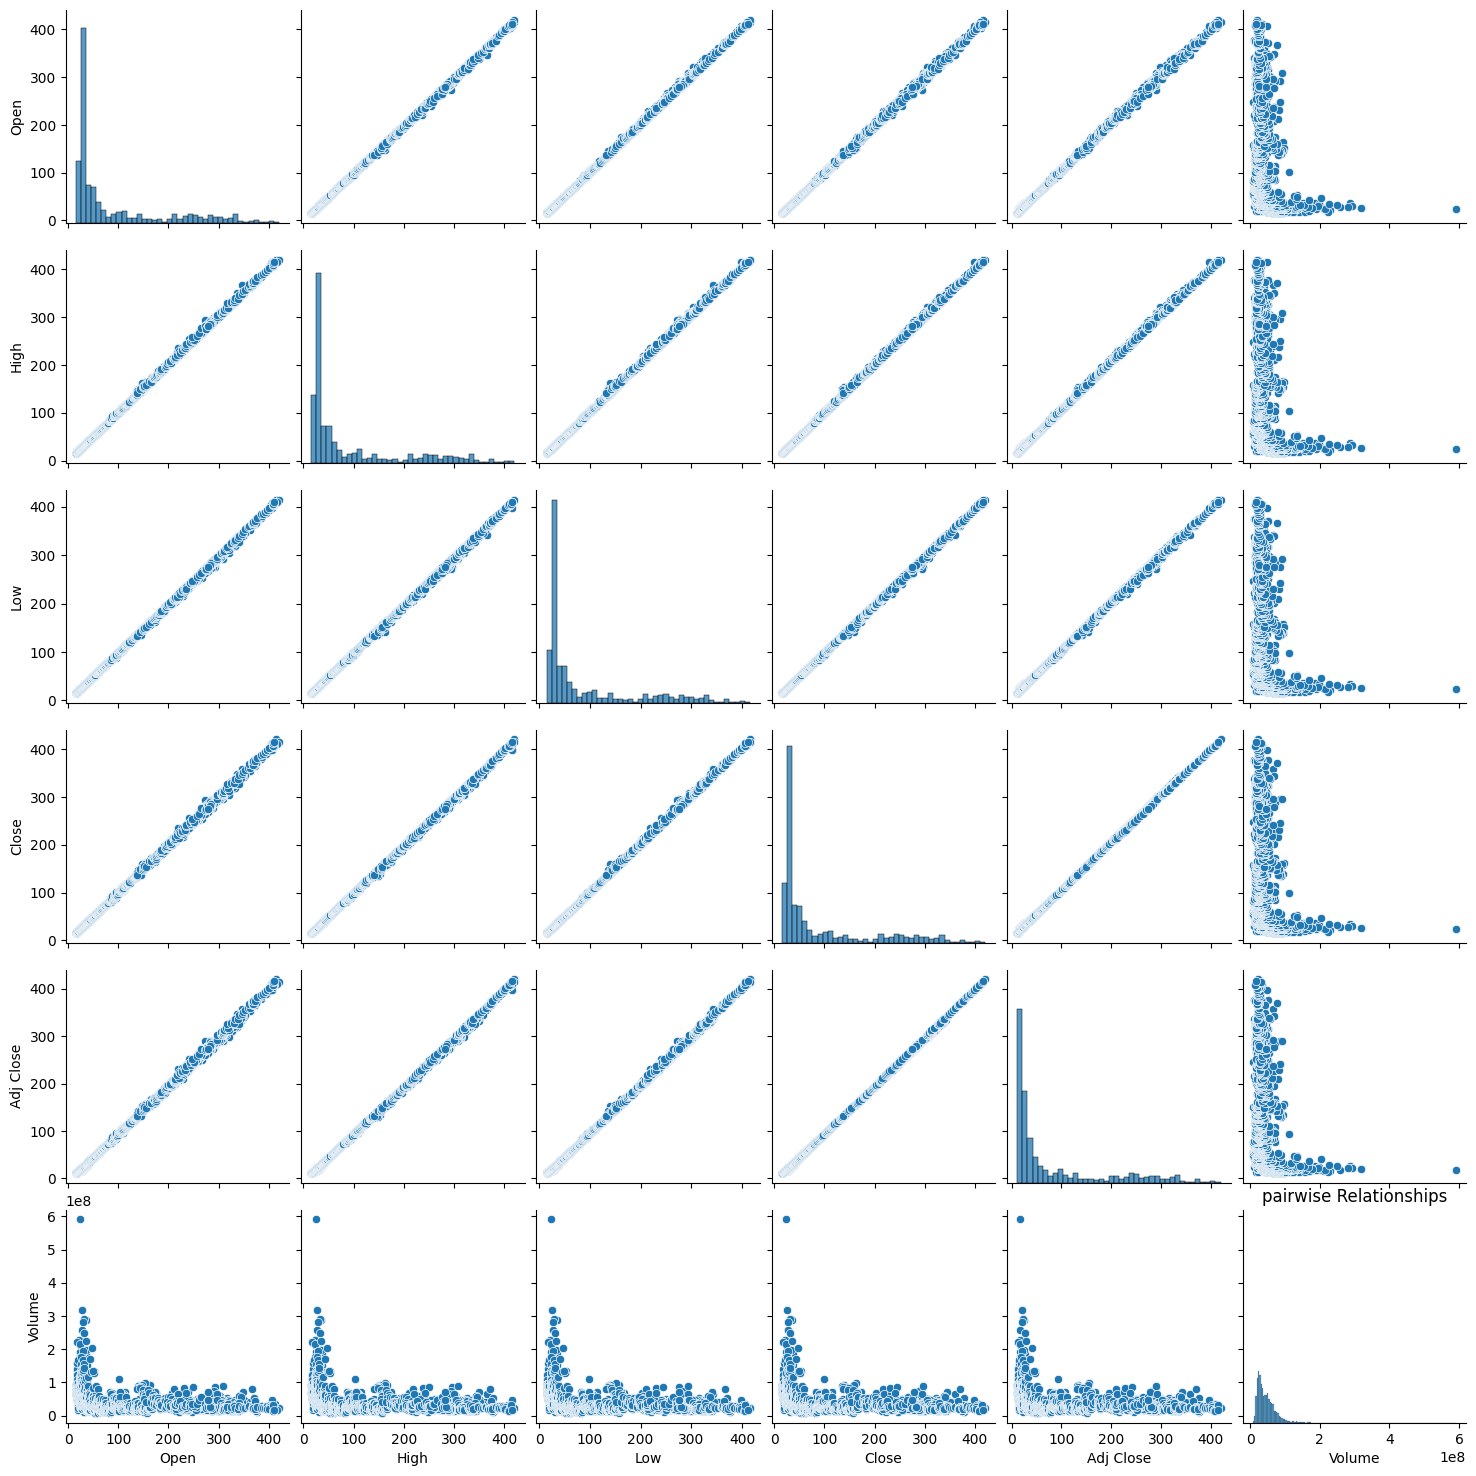

In [ ]:
sns.pairplot(df)
plt.title('pairwise Relationships')
plt.show()

The pairplot display pairwise relationships between diffrent variables
it helps to identify significant correlations or patters between the variables

### Days of weeks analysis

In [ ]:
df1.head()

Date       Open       High        Low      Close  Adj Close    Volume  \
0 2004-03-04  26.330000  26.420000  26.209999  26.370001  16.462585  44023200   
1 2004-03-05  26.230000  26.600000  26.200001  26.350000  16.450094  59849800   
2 2004-03-08  26.309999  26.350000  25.809999  25.830000  16.125462  69367800   
3 2004-03-09  25.799999  25.969999  25.540001  25.719999  16.056793  81111700   
4 2004-03-10  25.650000  25.799999  25.350000  25.370001  15.838284  75155800   

  month  year  Quarter  
0   Mar  2004        1  
1   Mar  2004        1  
2   Mar  2004        1  
3   Mar  2004        1  
4   Mar  2004        1

In [ ]:
df1['day_of_week'] = df1['Date'].dt.day_name()

In [ ]:
df1.head()

Date       Open       High        Low      Close  Adj Close    Volume  \
0 2004-03-04  26.330000  26.420000  26.209999  26.370001  16.462585  44023200   
1 2004-03-05  26.230000  26.600000  26.200001  26.350000  16.450094  59849800   
2 2004-03-08  26.309999  26.350000  25.809999  25.830000  16.125462  69367800   
3 2004-03-09  25.799999  25.969999  25.540001  25.719999  16.056793  81111700   
4 2004-03-10  25.650000  25.799999  25.350000  25.370001  15.838284  75155800   

  month  year  Quarter day_of_week  
0   Mar  2004        1    Thursday  
1   Mar  2004        1      Friday  
2   Mar  2004        1      Monday  
3   Mar  2004        1     Tuesday  
4   Mar  2004        1   Wednesday

### Lag plots

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

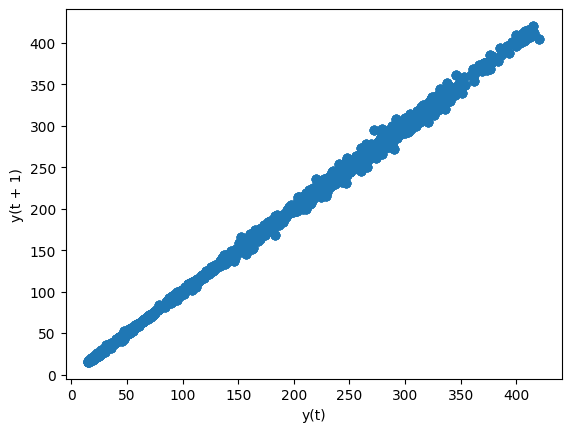

In [ ]:
for i in [10,20,30,40,50]:
    pd.plotting.lag_plot(df['Open'])

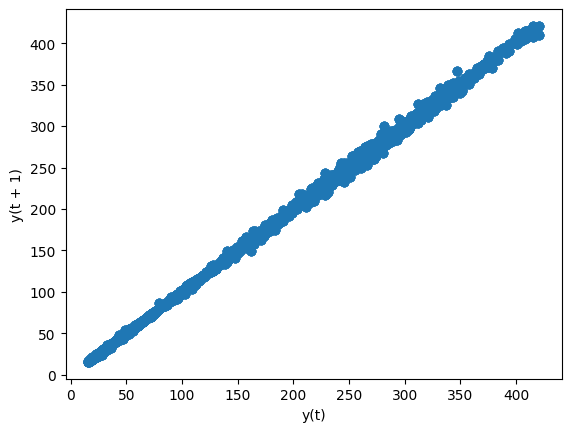

In [ ]:
for i in [10,20,30,40,50]:
    pd.plotting.lag_plot(df['High'])

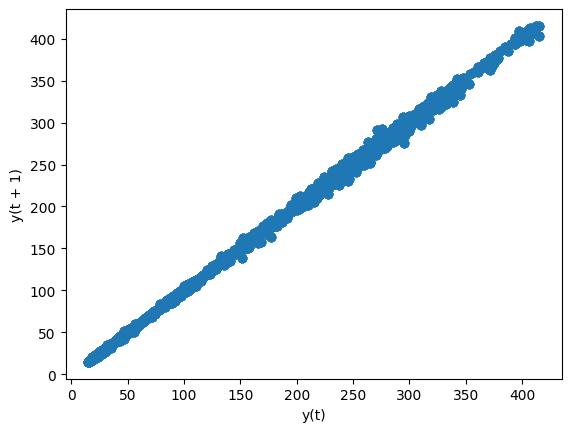

In [ ]:
for i in [10,20,30,40,50]:
    pd.plotting.lag_plot(df['Low'])

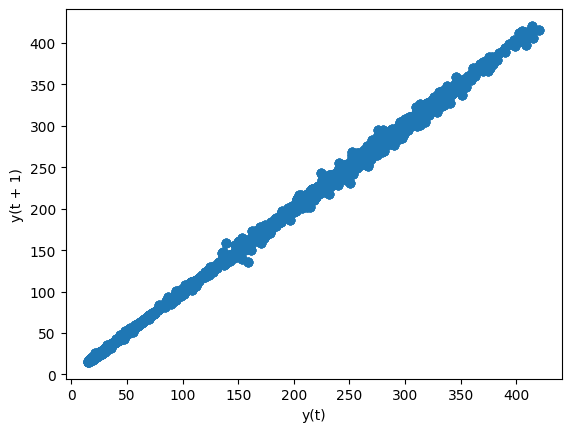

In [ ]:
for i in [10,20,30,40,50]:
    pd.plotting.lag_plot(df['Close'])

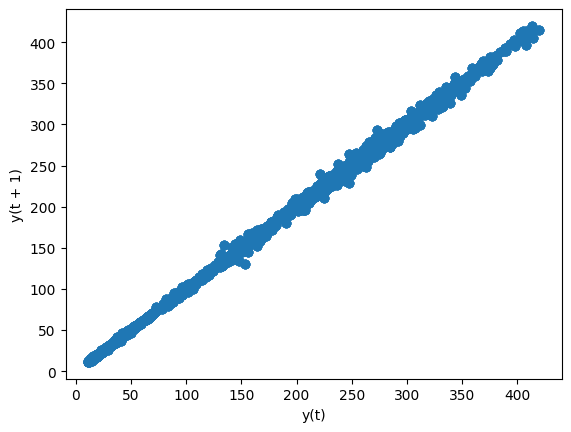

In [ ]:
for i in [10,20,30,40,50]:
    pd.plotting.lag_plot(df['Adj Close'])

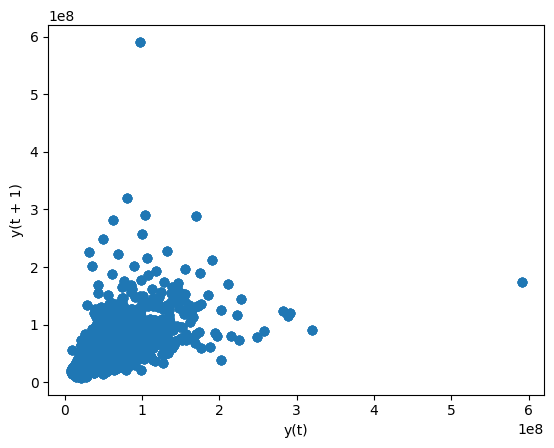

In [ ]:
for i in [10,20,30,40,50]:
    pd.plotting.lag_plot(df['Volume'])

#### Observation:
In this graph we are taking 10 days avrage like (10,20,30,40) , the average increasing in number of day the graph get more smoother which has lots of up and downs for daily days

### Moving average plots

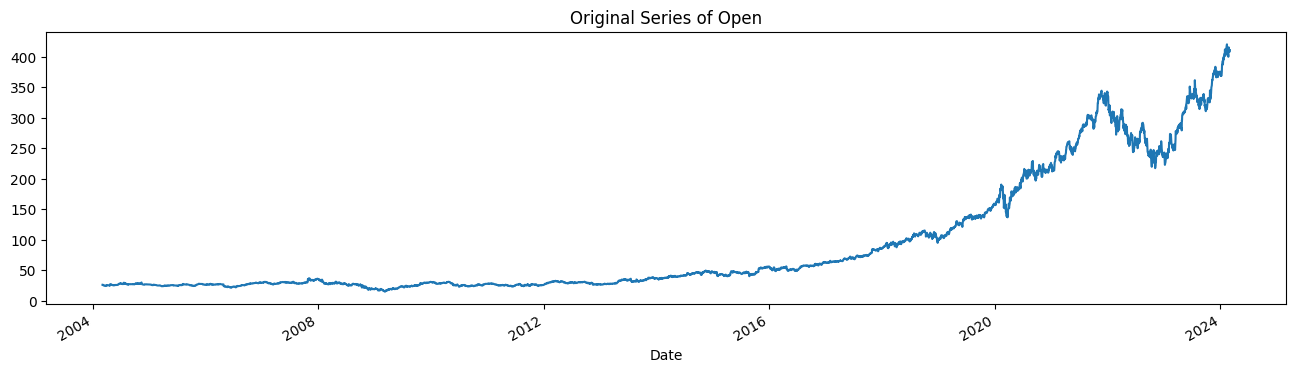

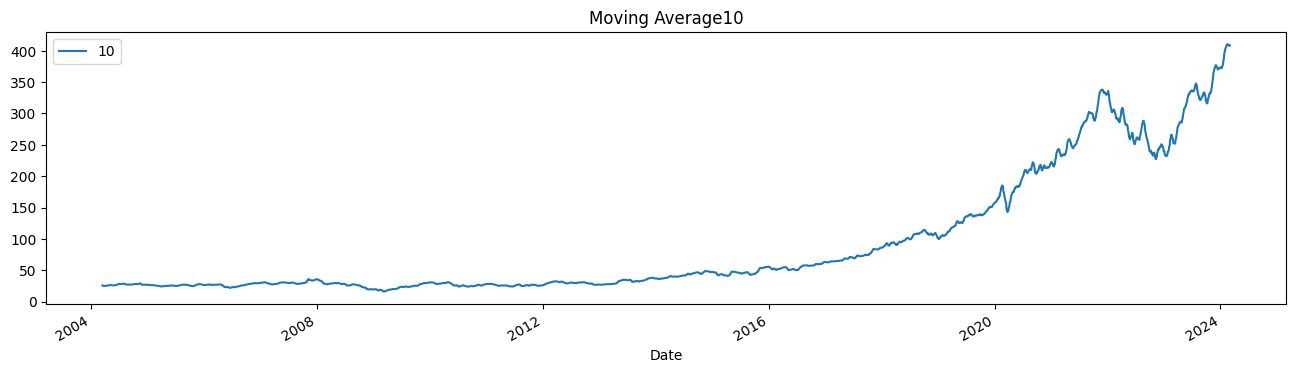

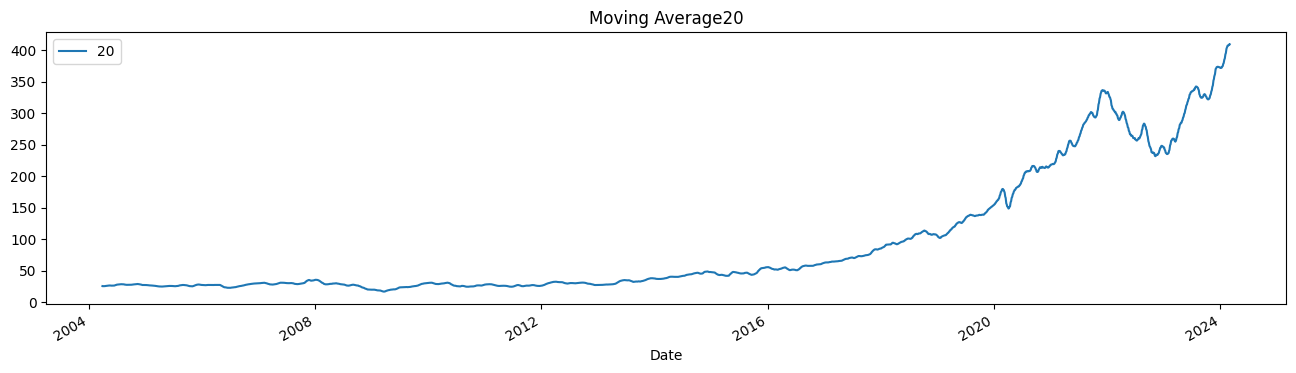

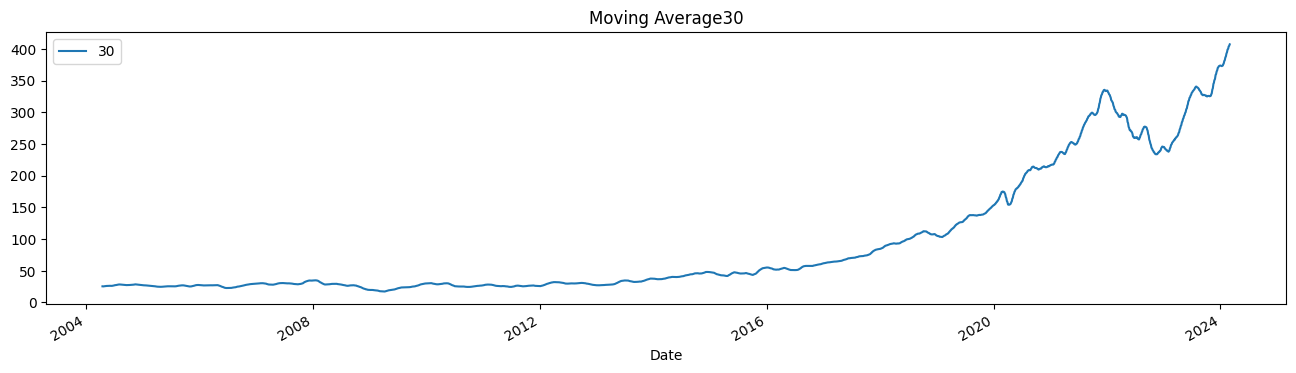

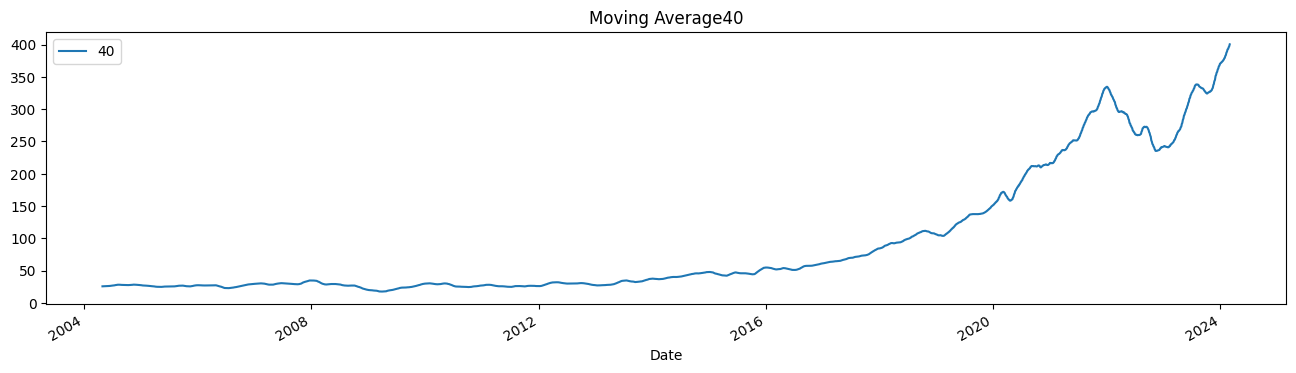

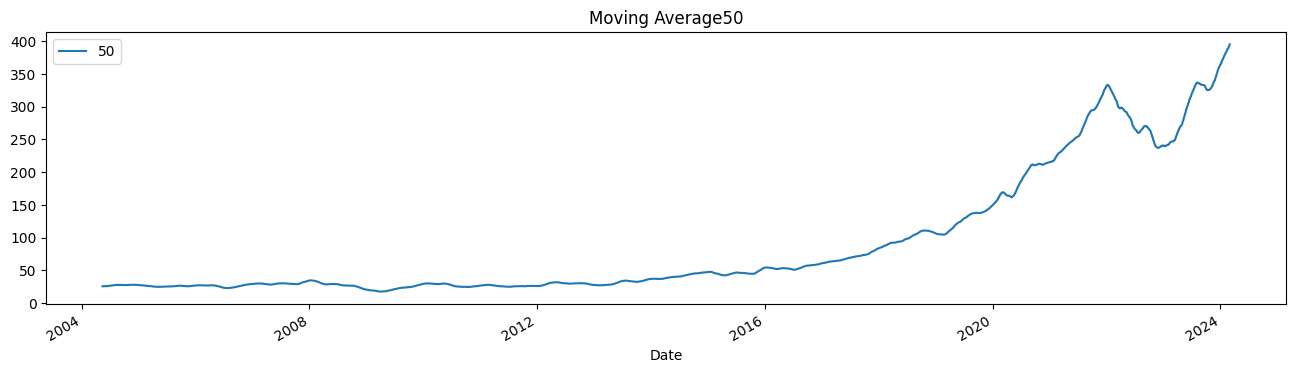

In [ ]:
plt.figure(figsize=(16,4))
df['Open'].plot(label="org")
plt.title("Original Series of Open")
for i in range(10,51,10):
    plt.figure(figsize=(16,4))
    df['Open'].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average" +str(i))
    plt.legend(loc='best')

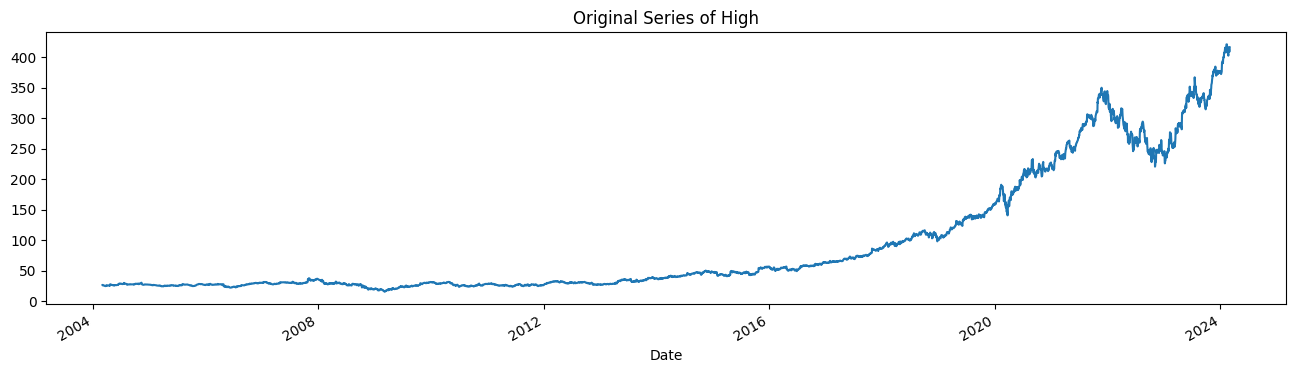

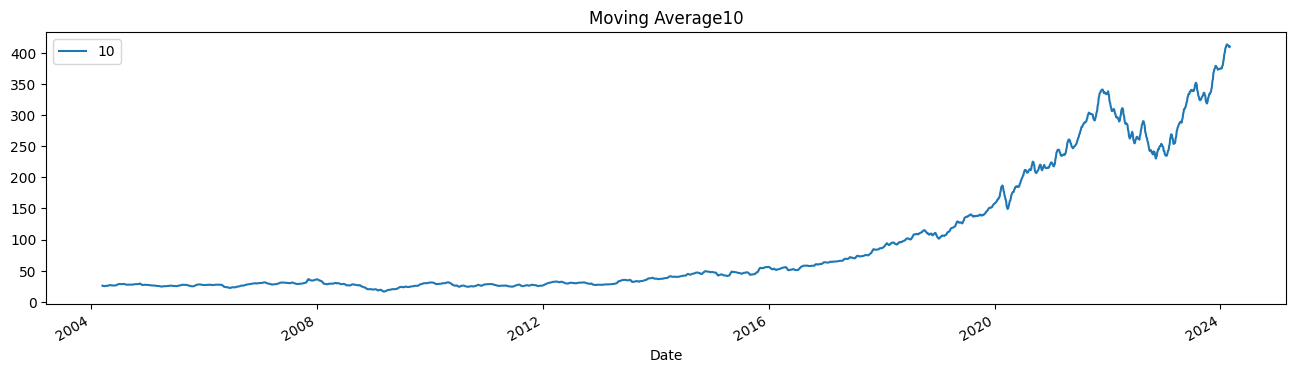

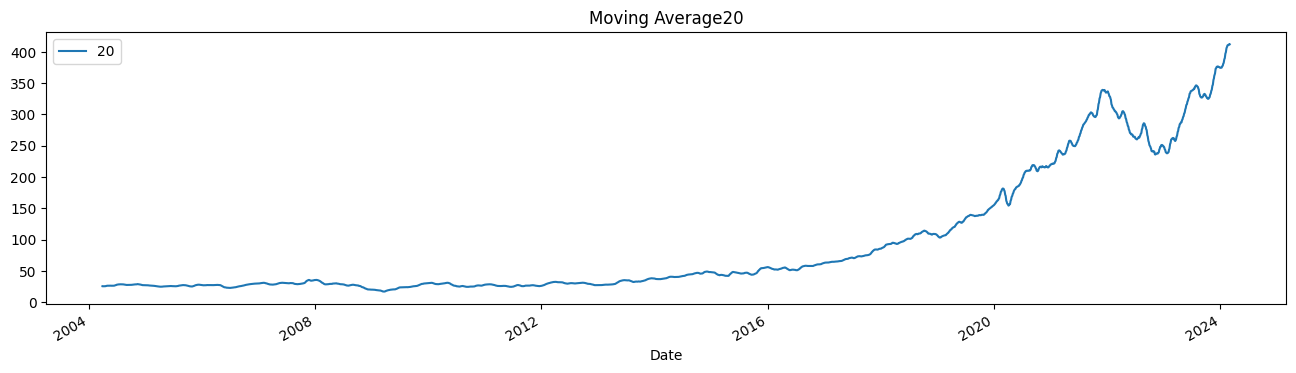

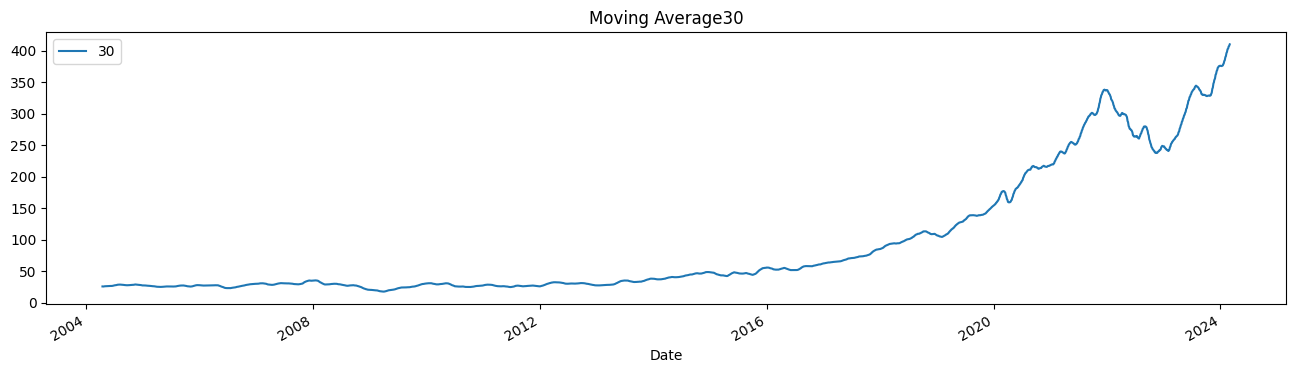

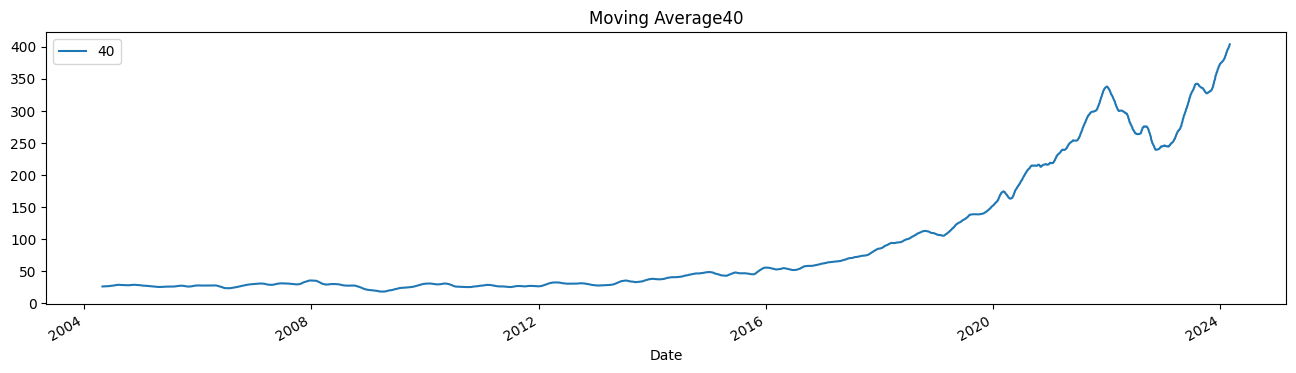

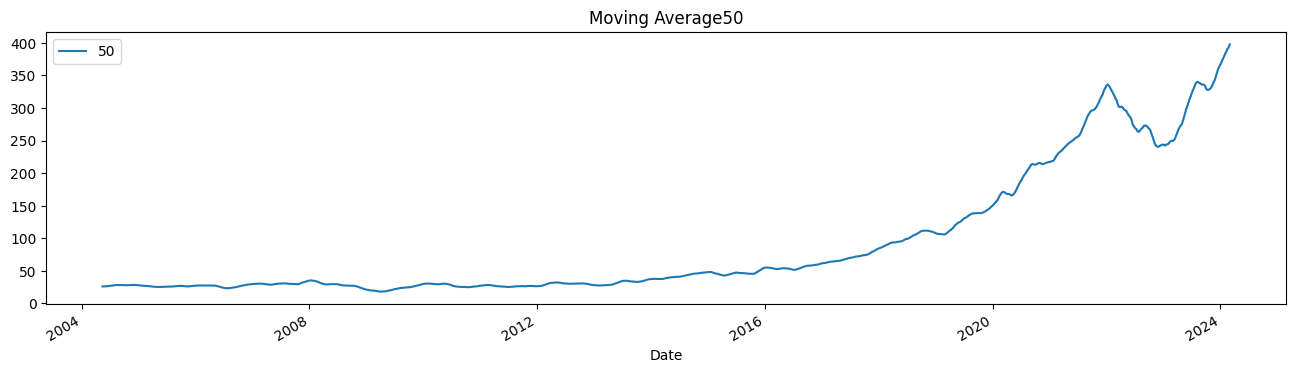

In [ ]:
plt.figure(figsize=(16,4))
df['High'].plot(label="org")
plt.title("Original Series of High")
for i in range(10,51,10):
    plt.figure(figsize=(16,4))
    df['High'].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average" +str(i))
    plt.legend(loc='best')

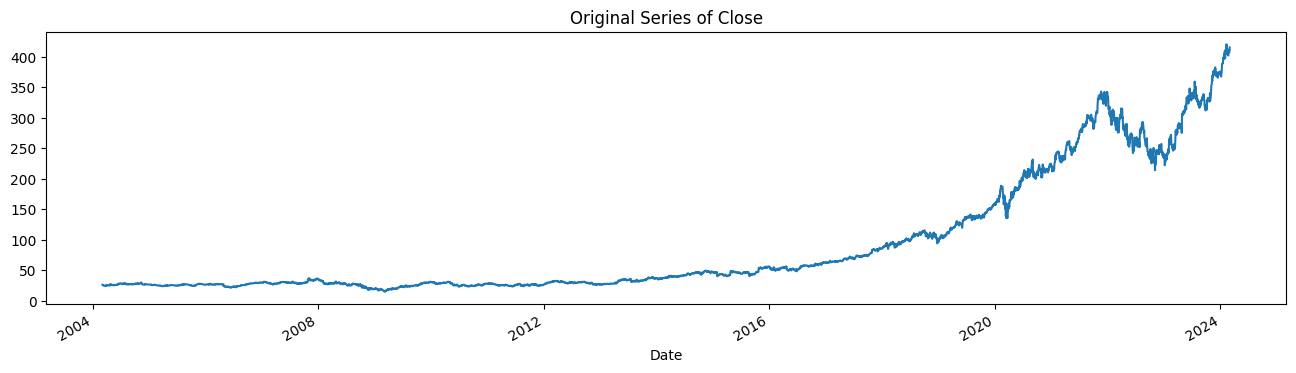

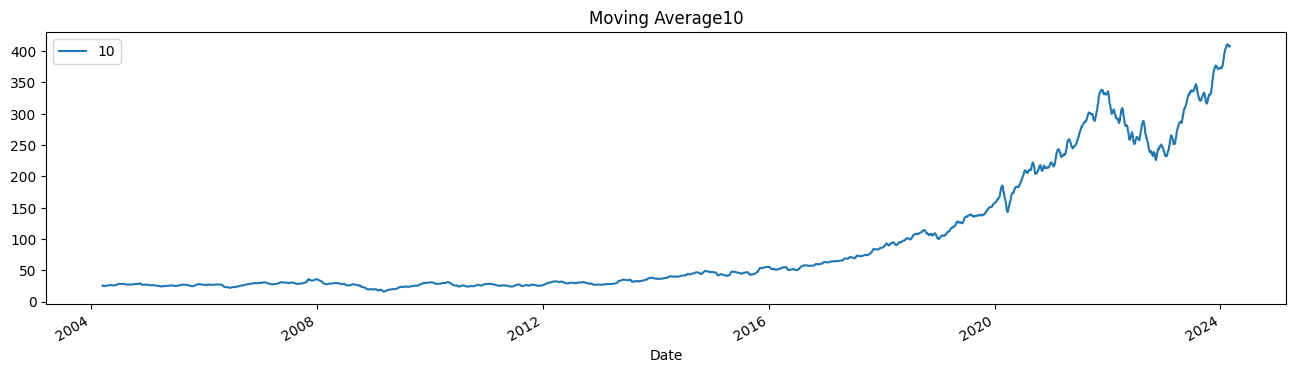

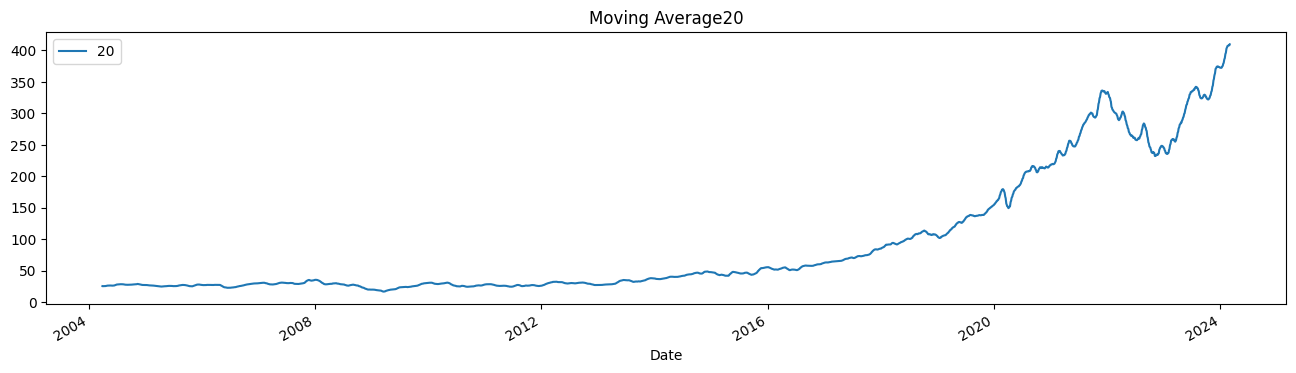

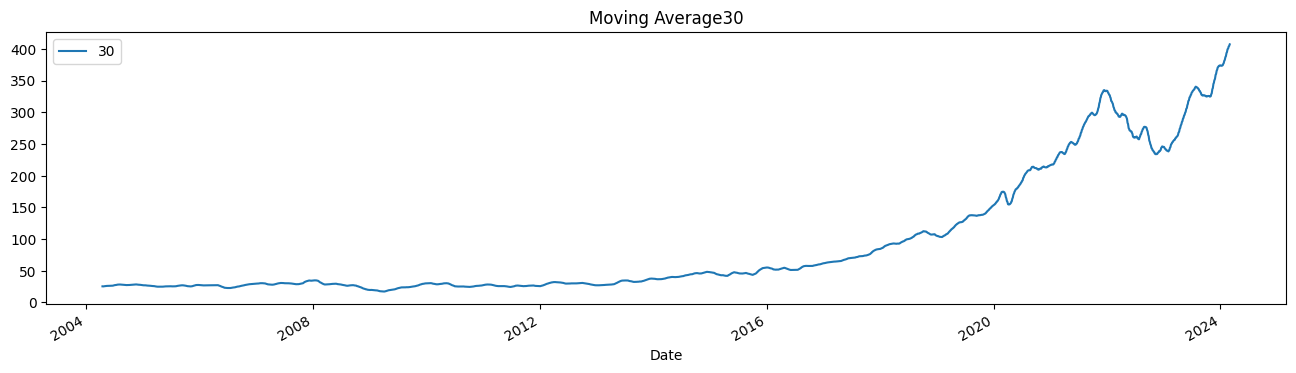

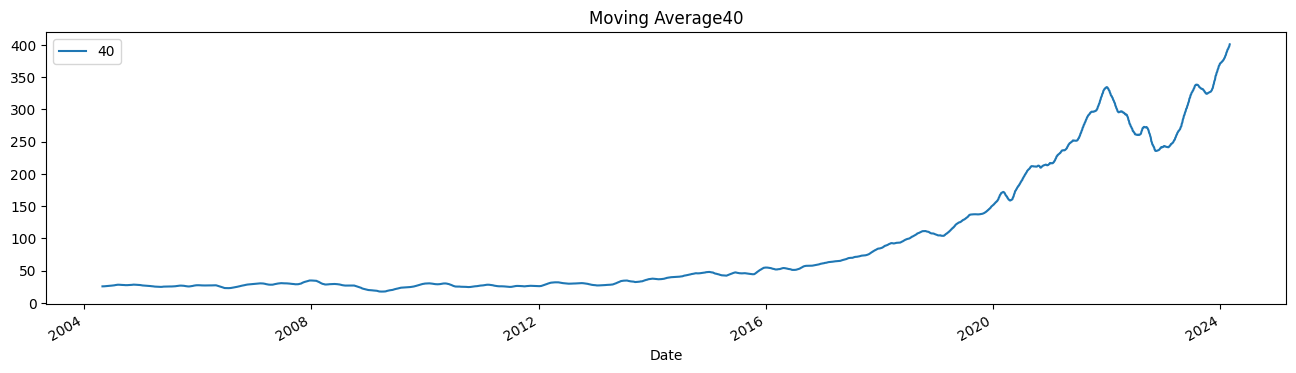

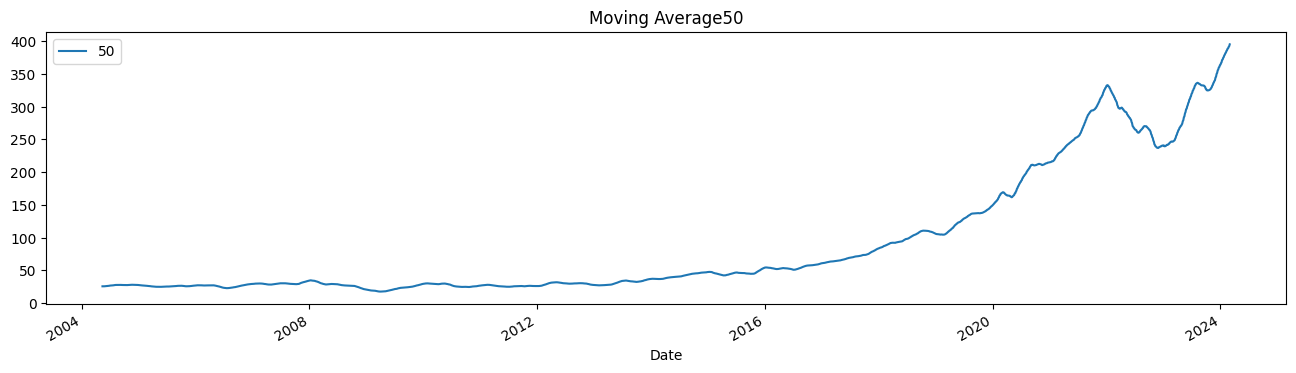

In [ ]:
plt.figure(figsize=(16,4))
df['Close'].plot(label="org")
plt.title("Original Series of Close")
for i in range(10,51,10):
    plt.figure(figsize=(16,4))
    df['Close'].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average" +str(i))
    plt.legend(loc='best')

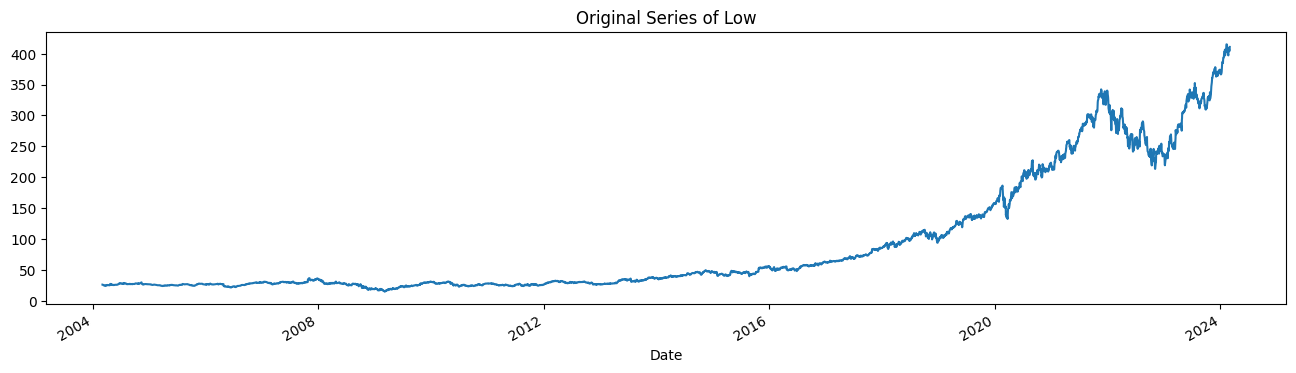

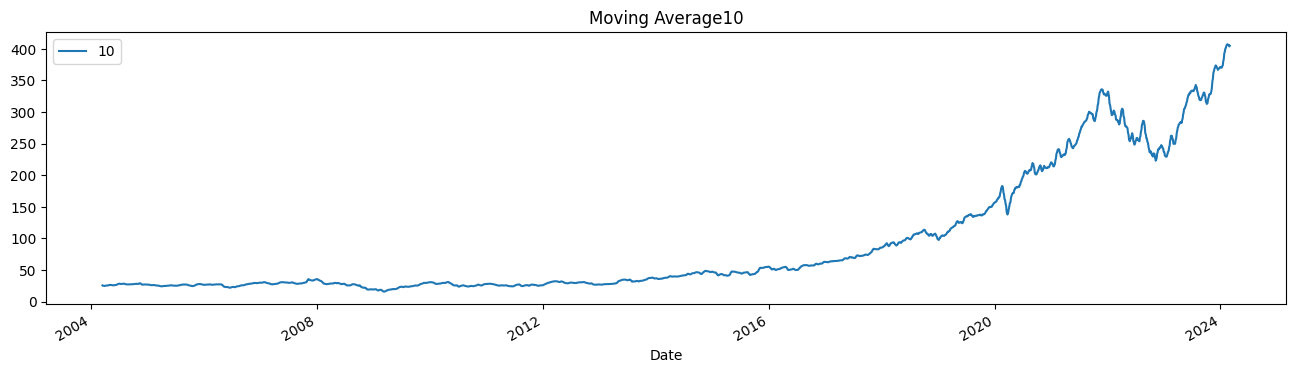

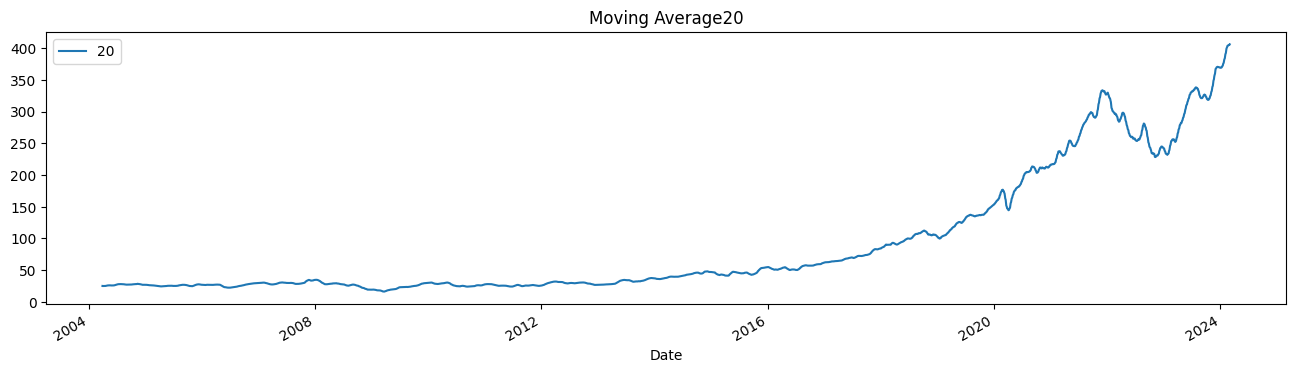

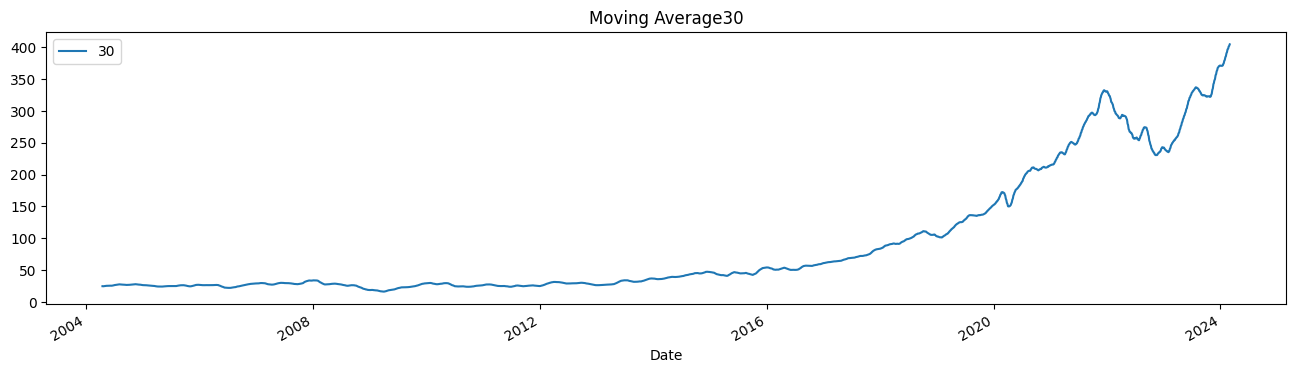

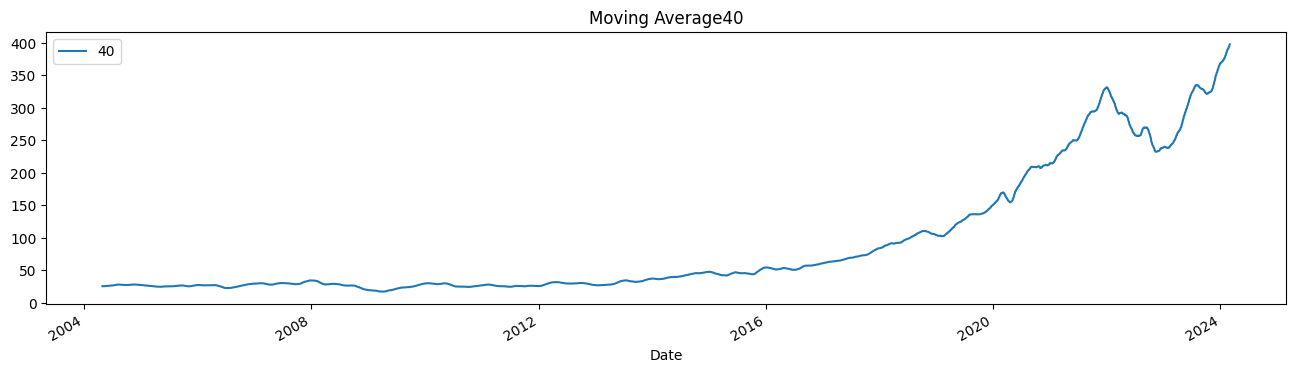

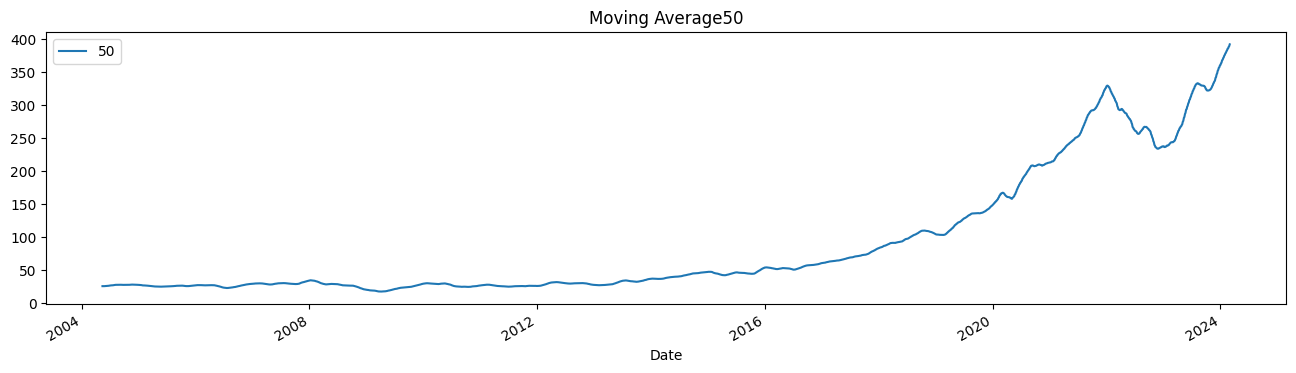

In [ ]:
plt.figure(figsize=(16,4))
df['Low'].plot(label="org")
plt.title("Original Series of Low")
for i in range(10,51,10):
    plt.figure(figsize=(16,4))
    df['Low'].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average" +str(i))
    plt.legend(loc='best')

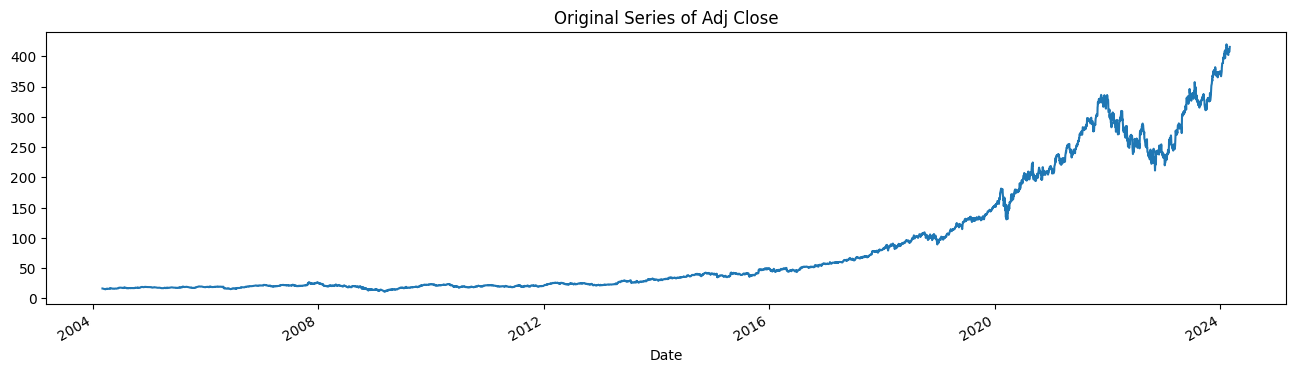

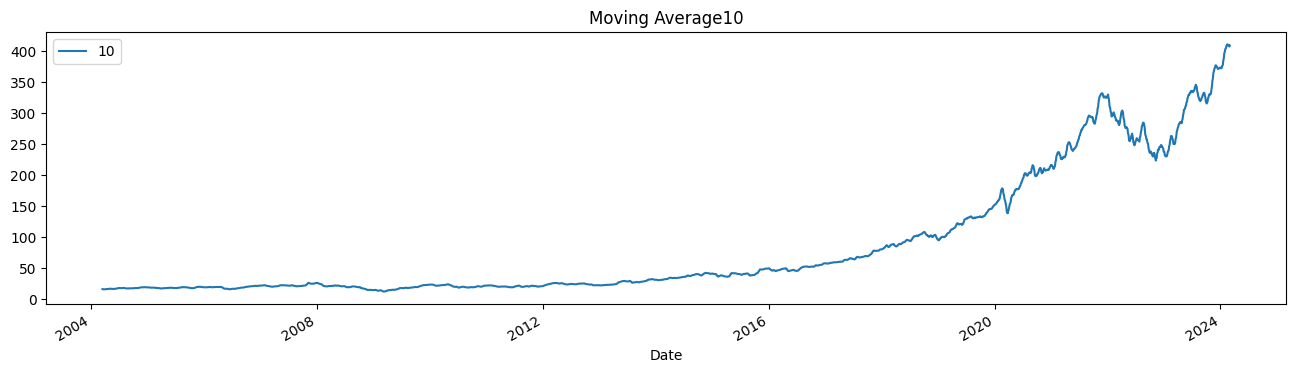

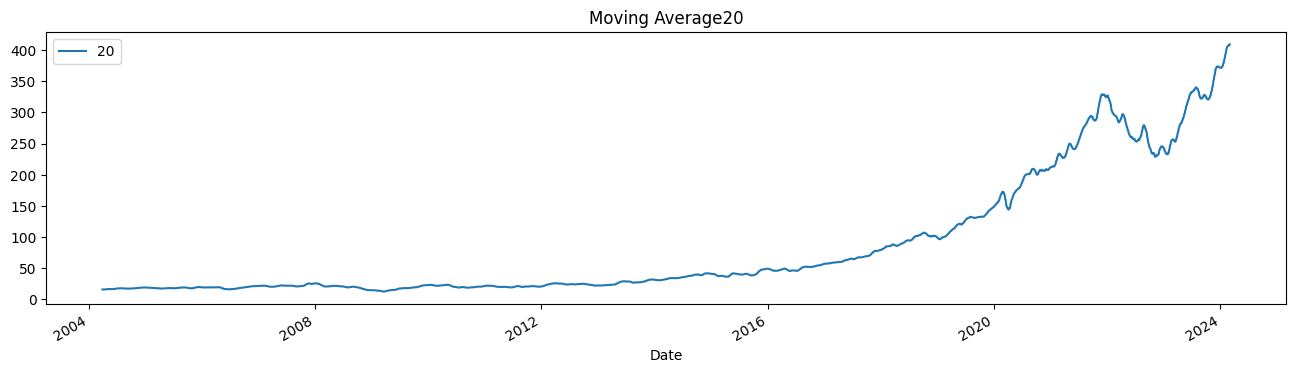

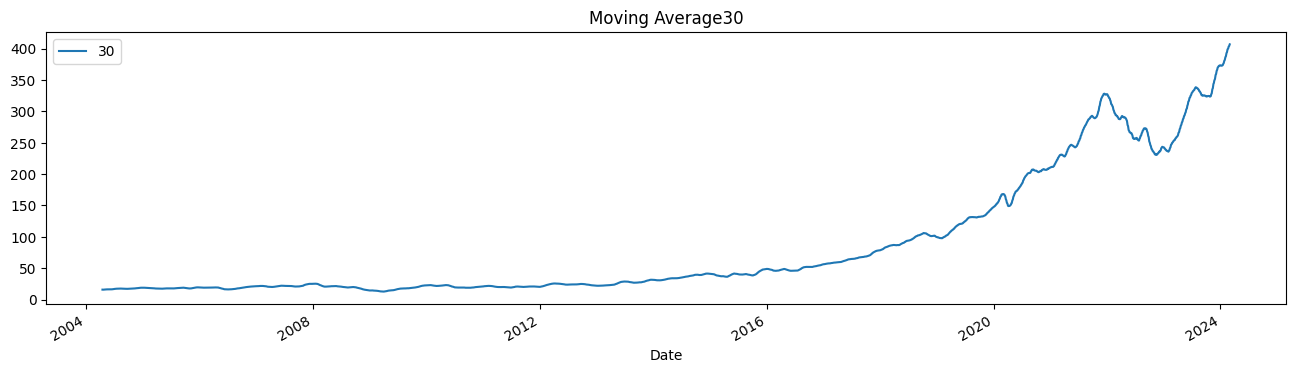

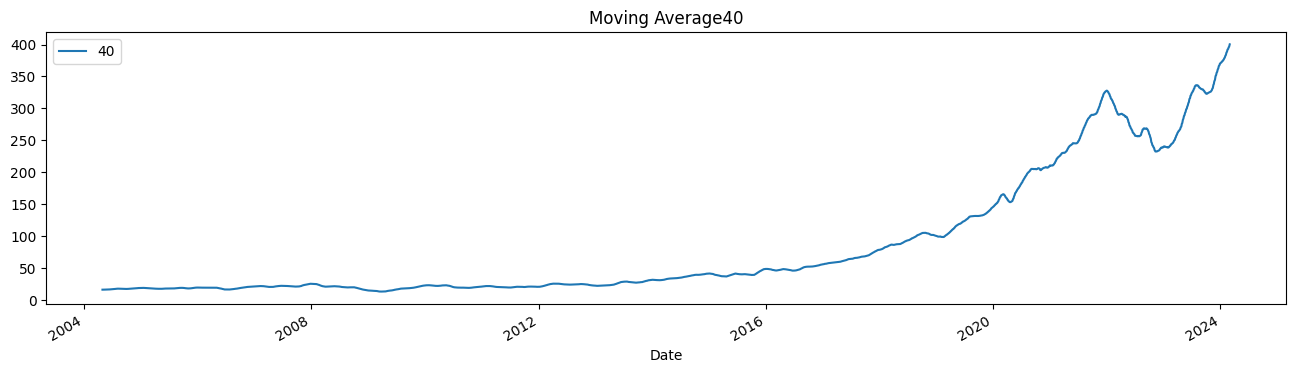

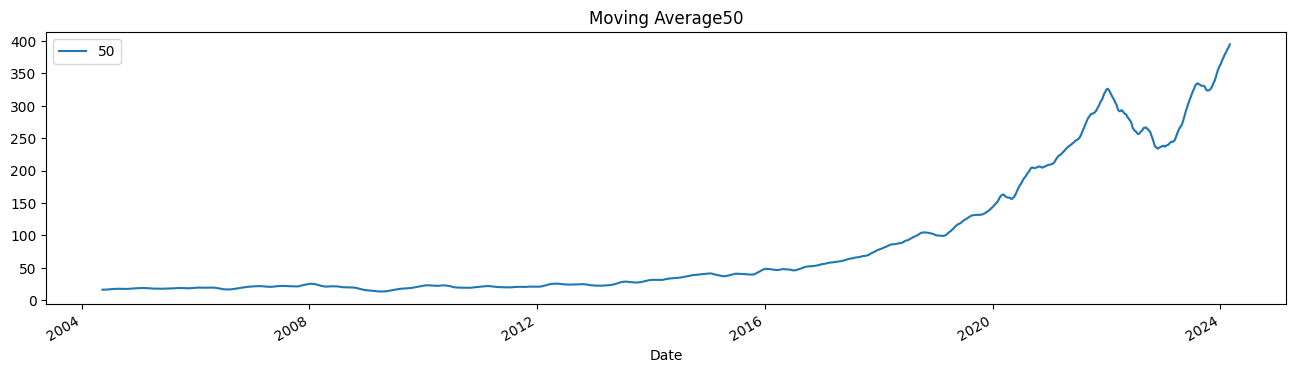

In [ ]:
plt.figure(figsize=(16,4))
df['Adj Close'].plot(label="org")
plt.title("Original Series of Adj Close")
for i in range(10,51,10):
    plt.figure(figsize=(16,4))
    df['Adj Close'].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average" +str(i))
    plt.legend(loc='best')

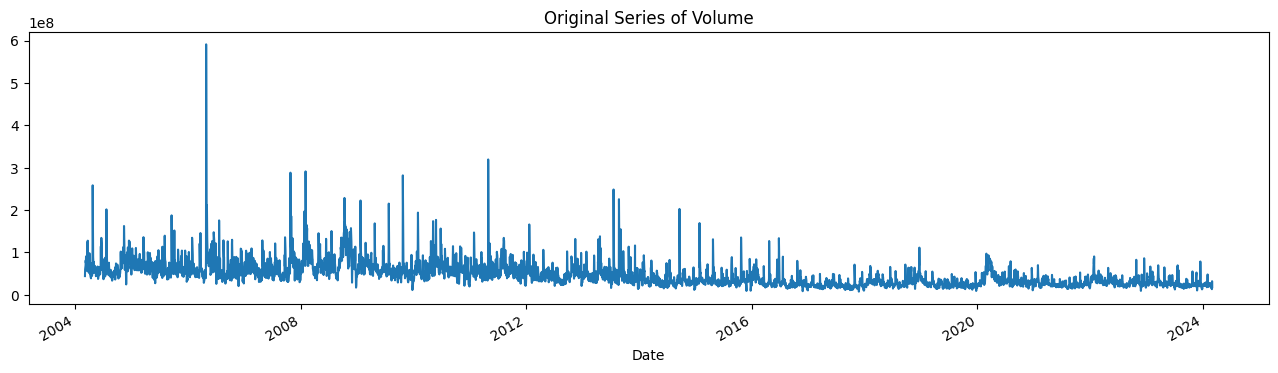

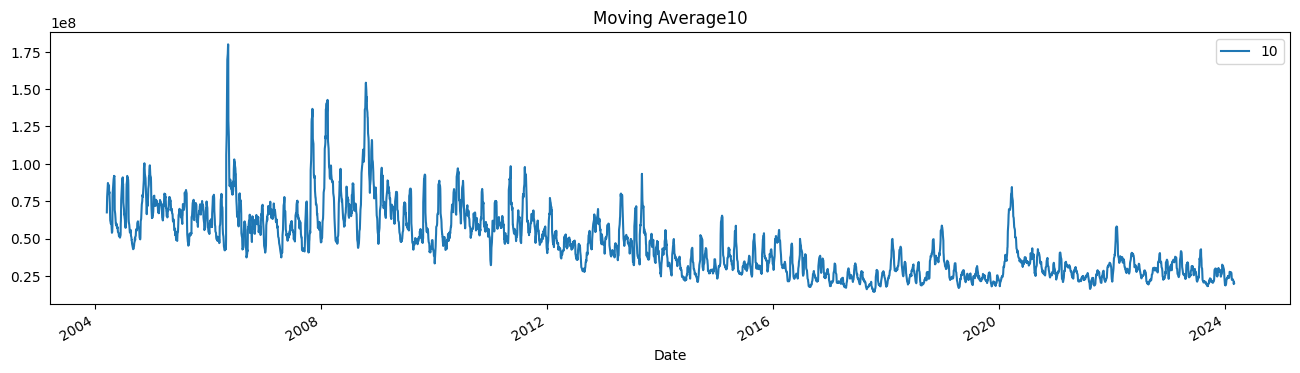

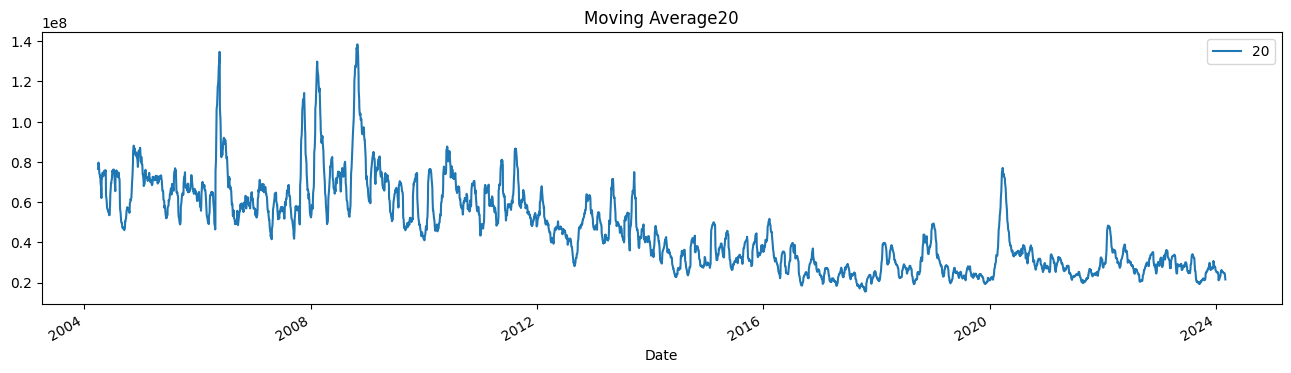

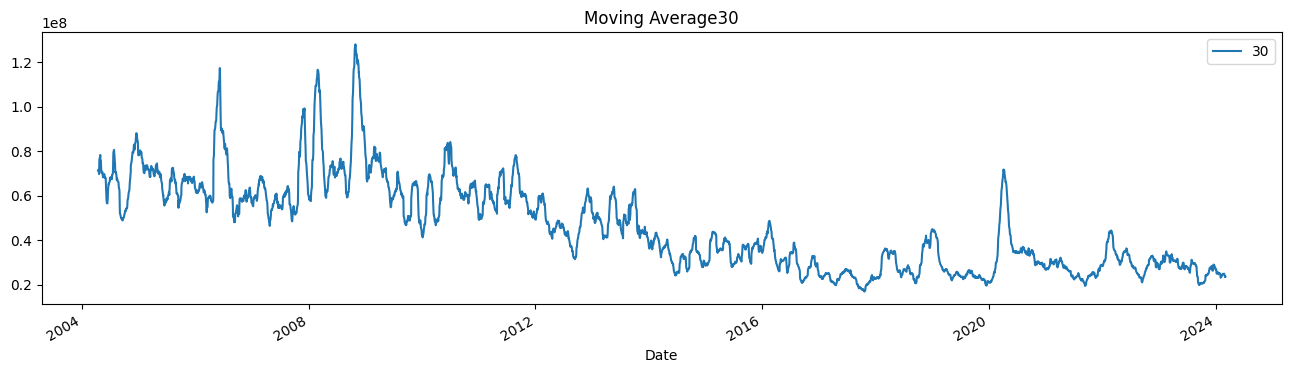

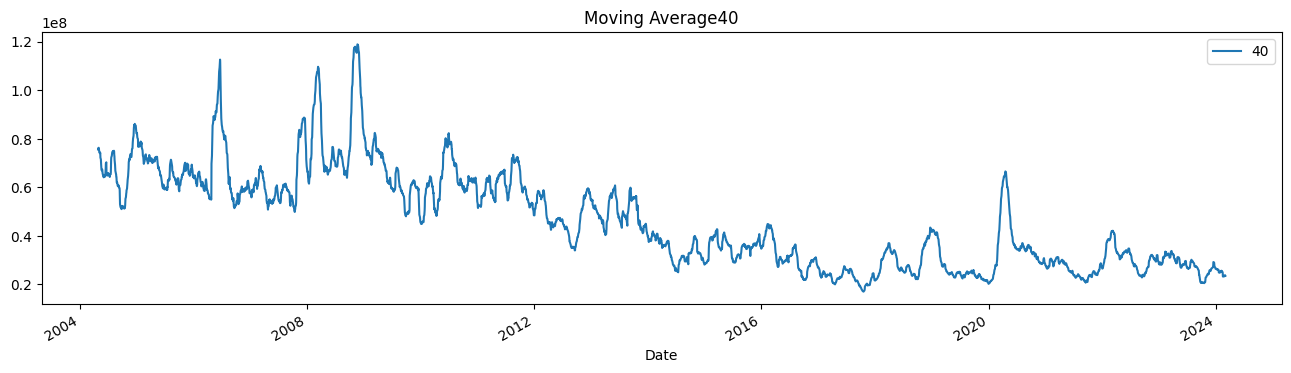

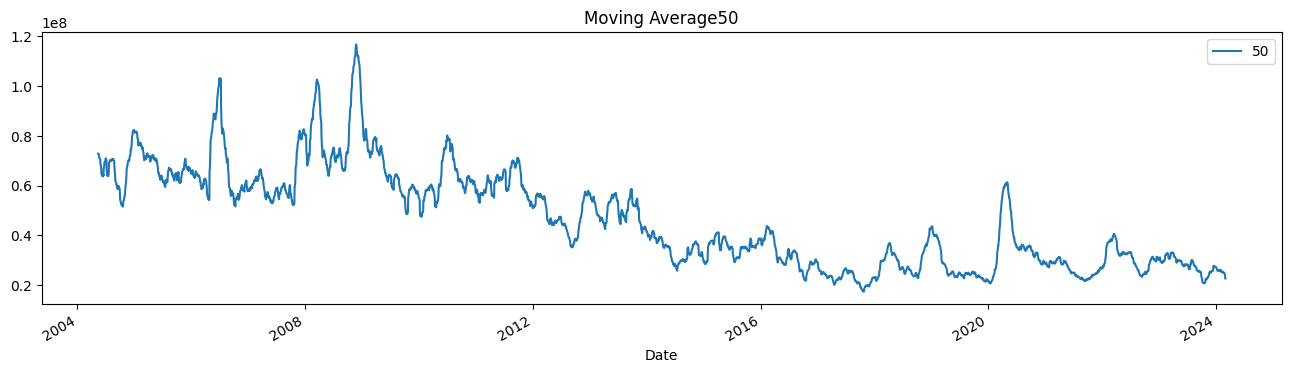

In [ ]:
plt.figure(figsize=(16,4))
df['Volume'].plot(label="org")
plt.title("Original Series of Volume")
for i in range(10,51,10):
    plt.figure(figsize=(16,4))
    df['Volume'].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average" +str(i))
    plt.legend(loc='best')

Conclusion:
* The resulting plots provide a visual representation of how the moving average of 'Open' prices changes with different window sizes. This can help in identifying trends and smoothing out fluctuations in the original time series data.

* for volume there is no definte pattern and most of the values trend of diverge .

### Time Series Decomposition plot

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

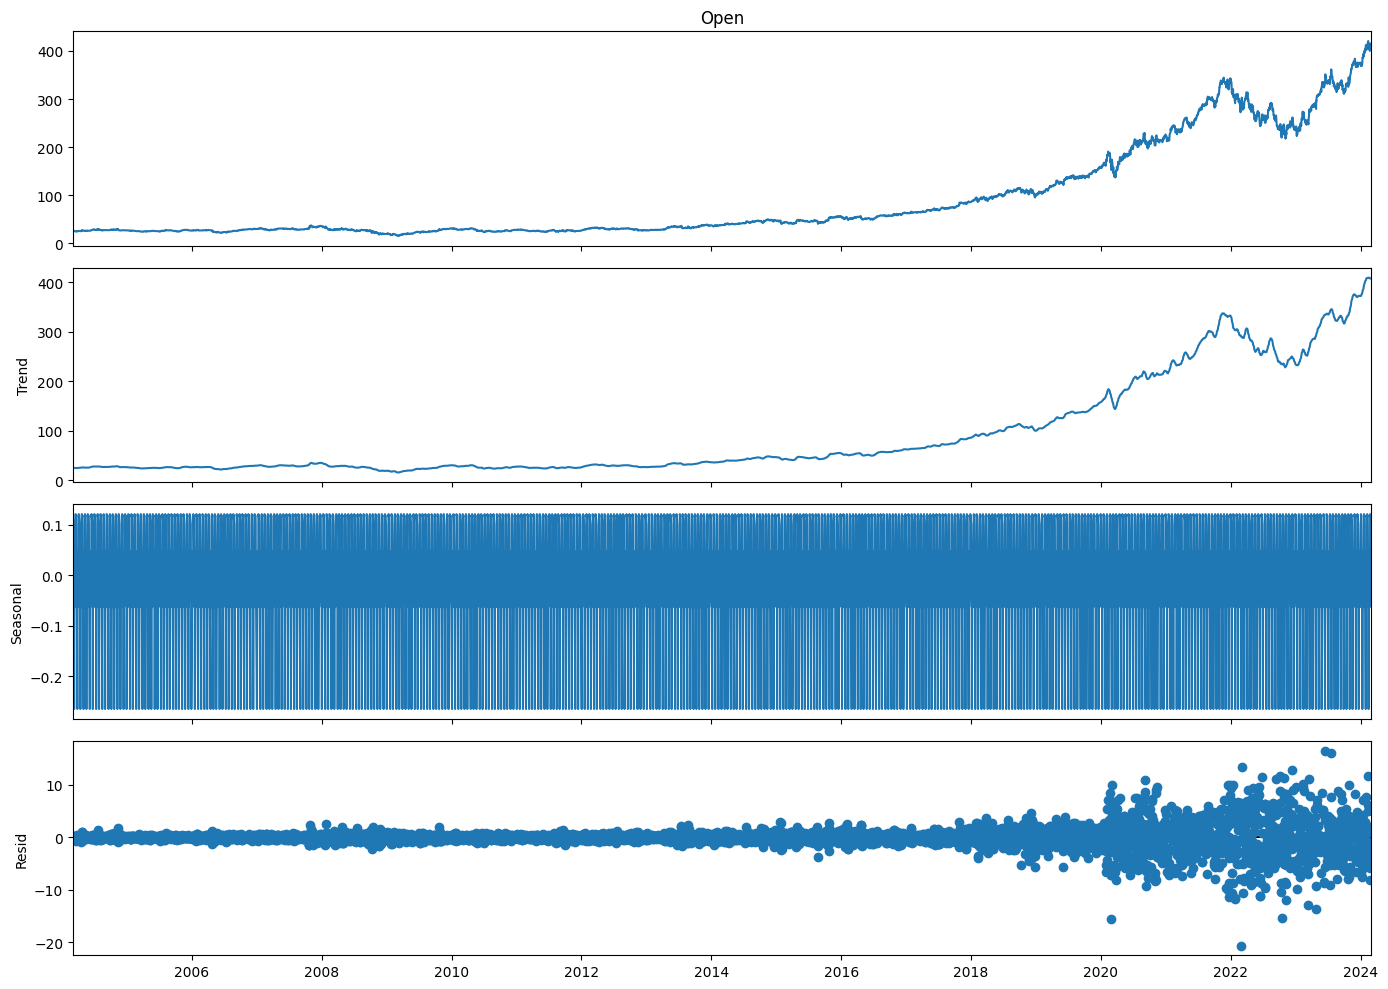

In [ ]:
decompose_ts_add = seasonal_decompose(df['Open'], period=12)
with plt.rc_context():
    plt.rc("figure",figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

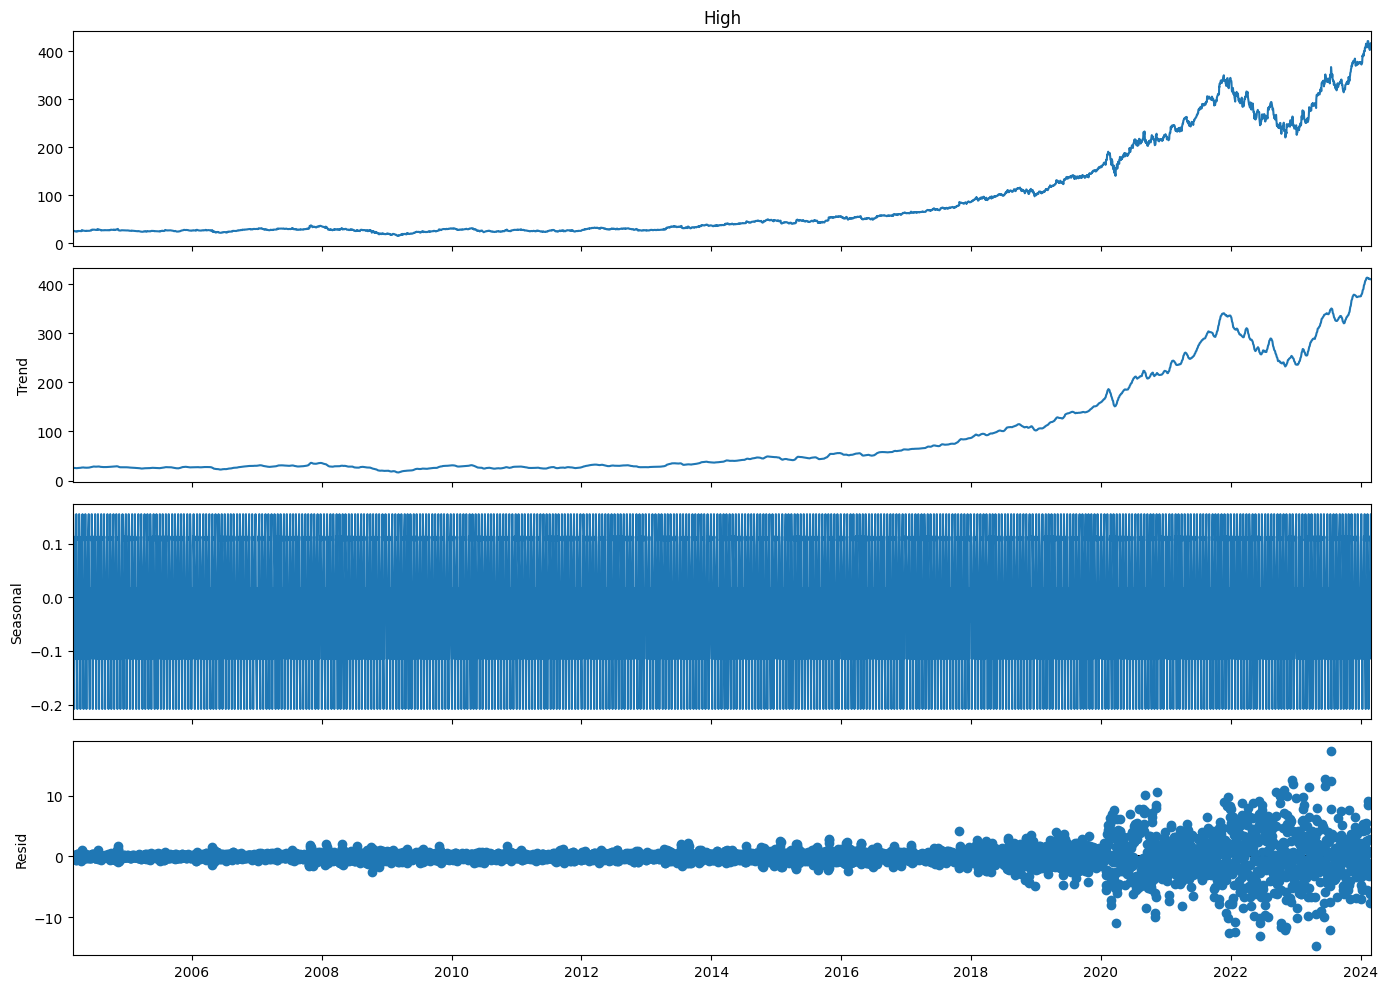

In [ ]:
decompose_ts_add = seasonal_decompose(df['High'], period=12)
with plt.rc_context():
    plt.rc("figure",figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

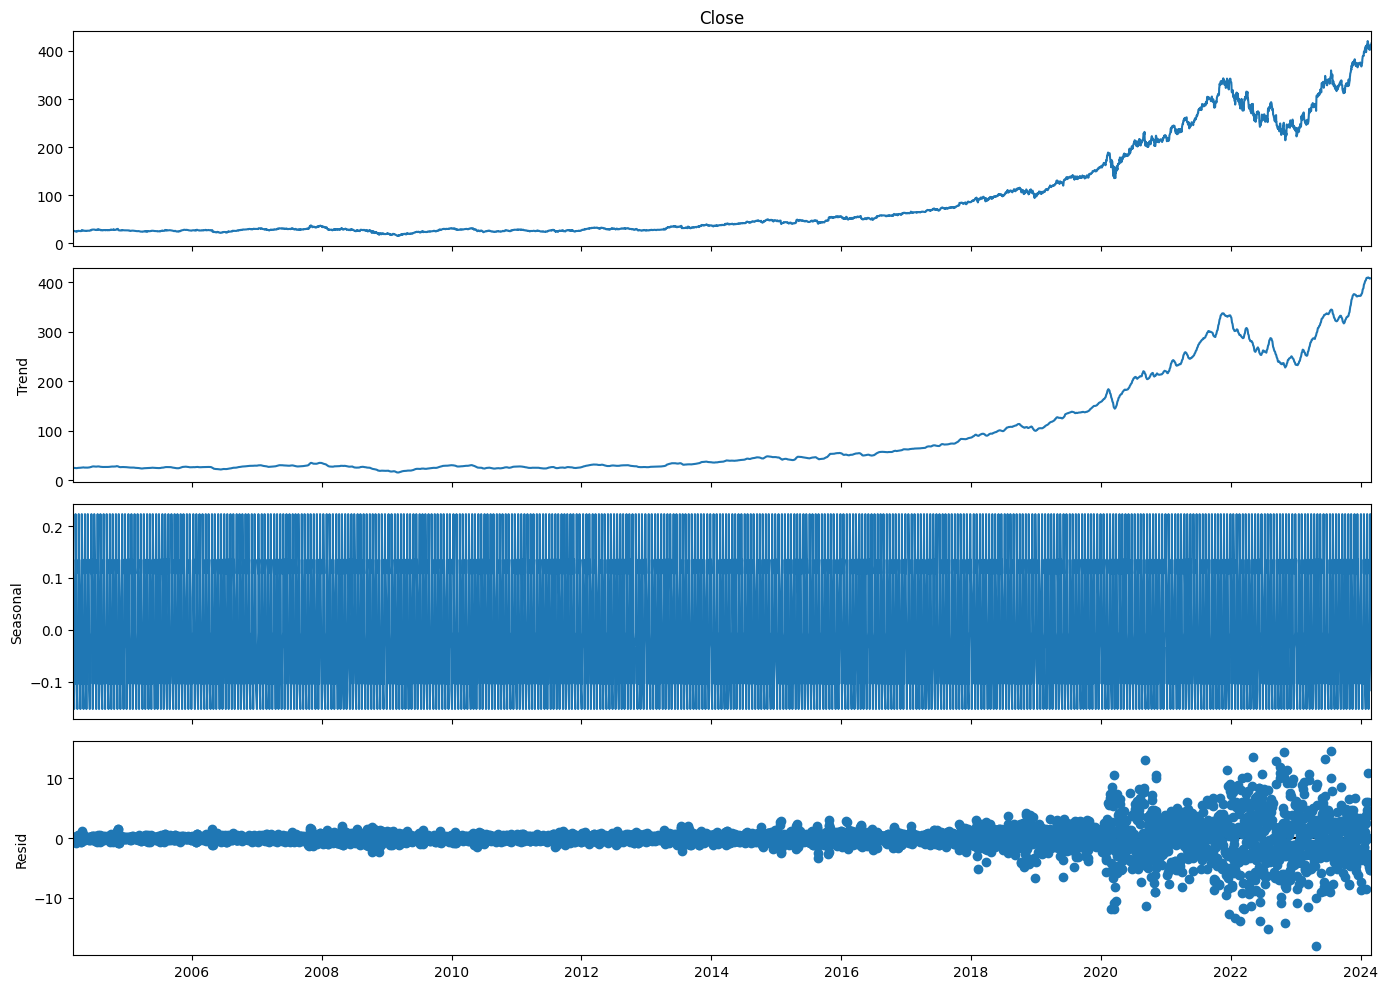

In [ ]:
decompose_ts_add = seasonal_decompose(df['Close'], period=12)
with plt.rc_context():
    plt.rc("figure",figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

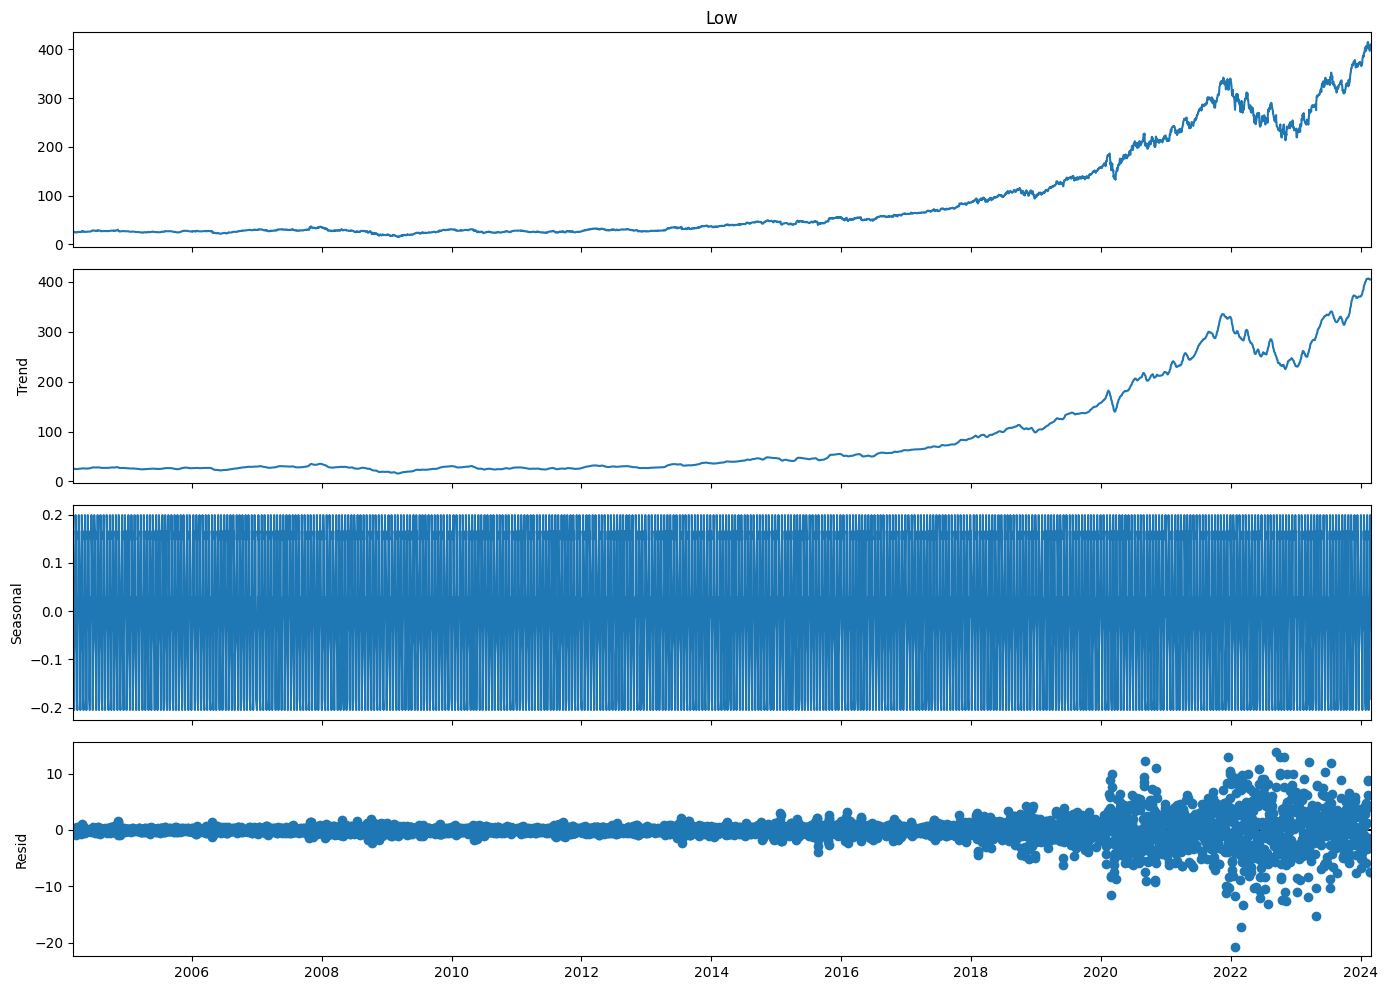

In [ ]:
decompose_ts_add = seasonal_decompose(df['Low'], period=12)
with plt.rc_context():
    plt.rc("figure",figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

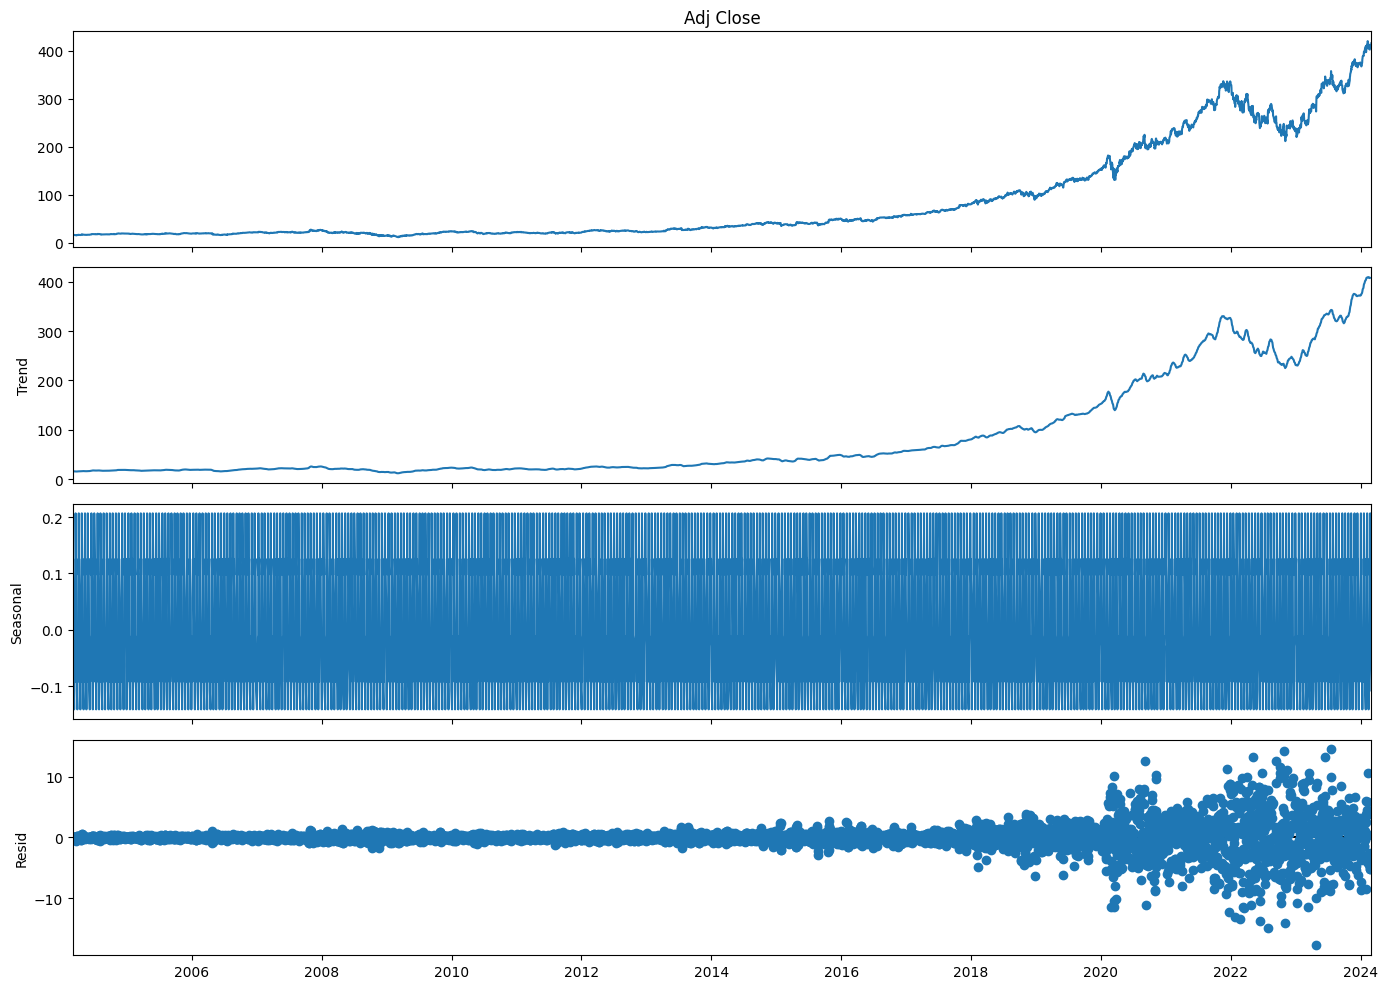

In [ ]:
decompose_ts_add = seasonal_decompose(df['Adj Close'], period=12)
with plt.rc_context():
    plt.rc("figure",figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

In [ ]:
decompose_ts_add = seasonal_decompose(df['Volume'], period=12)
with plt.rc_context():
    plt.rc("figure",figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

### Conculsion
* The resulting plots provide a graphical representation of how the original time series can be broken down into its individual components: trend, seasonality, and residual. This helps in understanding the underlying patterns and structures within the time series data, which can be useful for analysis and forecasting.

* for all prices and volume data we can see that the seasonal decompostion graph has give 4 graph each



## ACF and PACF plot

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(12,6))
    fig, ax = plt.subplots()
    tsa_plots.plot_acf(df['Open'], ax = ax)
    ax.set_xlim(-1,40)
    plt.show()

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(12,6))
    fig, ax = plt.subplots()
    tsa_plots.plot_acf(df['High'], ax = ax)
    ax.set_xlim(-1,40)
    plt.show()

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(12,6))
    fig, ax = plt.subplots()
    tsa_plots.plot_acf(df['Close'], ax = ax)
    ax.set_xlim(-1,40)
    plt.show()

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(12,6))
    fig, ax = plt.subplots()
    tsa_plots.plot_acf(df['Low'], ax = ax)
    ax.set_xlim(-1,40)
    plt.show()

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(12,6))
    fig, ax = plt.subplots()
    tsa_plots.plot_acf(df['Adj Close'], ax = ax)
    ax.set_xlim(-1,40)
    plt.show()

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(12,6))
    fig, ax = plt.subplots()
    tsa_plots.plot_acf(df['Volume'], ax = ax)
    ax.set_xlim(-1,40)
    plt.show()

#### Observation:
* This graph shows the autocorrelation of the 'Open' prices with its lagged values. It helps in understanding the presence of any significant patterns or relationships between the observations at different time lags.


In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(12,4))
    tsa_plots.plot_pacf(df.Open)

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(12,4))
    tsa_plots.plot_pacf(df.High)

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(12,4))
    tsa_plots.plot_pacf(df.Close)

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(12,4))
    tsa_plots.plot_pacf(df.Low)

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(12,4))
    tsa_plots.plot_pacf(df.Volume)

#### Observation:
* The resulting plot visually represents the partial autocorrelation of the 'Open' prices with its lagged values. It helps in understanding the presence of any significant patterns or relationships between the observations at different time lags after accounting for shorter lags.
* the PACF  give the appropirate value for order of the Auto_regression model and here the appropriate values is 2

## Feature engineering

In [ ]:
df1.info()

In [ ]:
z = df1.copy()

In [ ]:
#Calculate the yearly average closing price
yearly_avg_close = z.groupby('year')['Close'].mean().reset_index()
yearly_avg_close.rename(columns={'Close':'Avg_Close'},inplace=True)

#Calculate the yearly price changes
yearly_price_change = yearly_avg_close['Avg_Close'].pct_change()
yearly_avg_close['Price_Change']= yearly_price_change

#Identify years with price increses and decreses
increasing_years = yearly_avg_close[yearly_avg_close['Price_Change'] > 0]['year'].tolist()
decreasing_years = yearly_avg_close[yearly_avg_close['Price_Change'] < 0]['year'].tolist()


print('Years with price increase:',increasing_years)
print('Years with price decrease:',decreasing_years)

In [ ]:
monthly_avg_close = z.groupby('month')['Close'].mean().reset_index()
monthly_avg_close.rename(columns={'Close':'Avg_Close'}, inplace=True)

# Calculate the monthly price changes
monthly_price_change = monthly_avg_close['Avg_Close'].pct_change()
monthly_avg_close['Price_Change'] = monthly_price_change

# Identify months with price increases and decreases
increasing_months = monthly_avg_close[monthly_avg_close['Price_Change'] > 0]['month'].tolist()
decreasing_months = monthly_avg_close[monthly_avg_close['Price_Change'] < 0]['month'].tolist()

print('Months with price increase:', increasing_months)
print('Months with price decrease:', decreasing_months)


In [ ]:
df3 = df.copy()

In [ ]:
upsampled_week = df3.resample('D').mean()
print(upsampled_week.head(13))

we can see here some NaN values are prsent so we have to fill this NaN values using the the function interpolated.

In [ ]:
interpolated_week = upsampled_week.interpolate(method='linear')
print(interpolated_week.head(13))
#interpolated_week.plot(figsize=(14,8))
#plt.show()

In [ ]:
interpolated_week

# Transformation

In [ ]:
from statsmodels.tsa.stattools import adfuller

#Determing rolling statistics
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #plot rolling statistics
    plt.figure(figsize = (16,4))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)

    #Perform the Dickey-Fuller test:
    print('Results of Dickey Fuller Test:')
    df1test = adfuller(timeseries['Close'], autolag='AIC')
    df1output = pd.Series(df1test[0:4], index=['Test Statistic', 'p_value', 'Lags Used', 'Number of Observations Used'])
    for key, value in df1test[4].items():
        df1output['Critical Value (%s)' % key] = value
    print(df1output)

#### Augmented Dicky Fuller Test
* Null Hypothesis (Ho): The is not stationary
* p-val>=0.05
* Alternate Hypothesis(H1): The series is stationary
* p-val<0.05   

* This code perfroms the Dickey-Fuller test on the 'Close' column of the time series data to check for stationarity
* these results help determine whether the time series is stationary or not.
* It print out the trend results, including the test statistic , p_value, number of lags used, and critical values of different


In [ ]:
interpolated_week.head()

In [ ]:
dclose = pd.DataFrame()
dclose = interpolated_week[['Close']].copy()
dclose.head()


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_stationarity(dclose)


In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series.dropna())
    labels = ['ADF test statistic', 'p_value','# lags used', '#observations']
    out = pd.Series(result[0:4],index=labels)
    #for key, vol in result[4].items():

    if result[1] <=0.05:
        print("Reject the null hypothesis")
        print("Data is non stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Date is non_stationary")



In [ ]:
adf_test(dclose)

Fail to reject the null hypothesis
Date is non_stationary


# Feature Scalling(Trasnsformation)

### Square Root Trasform

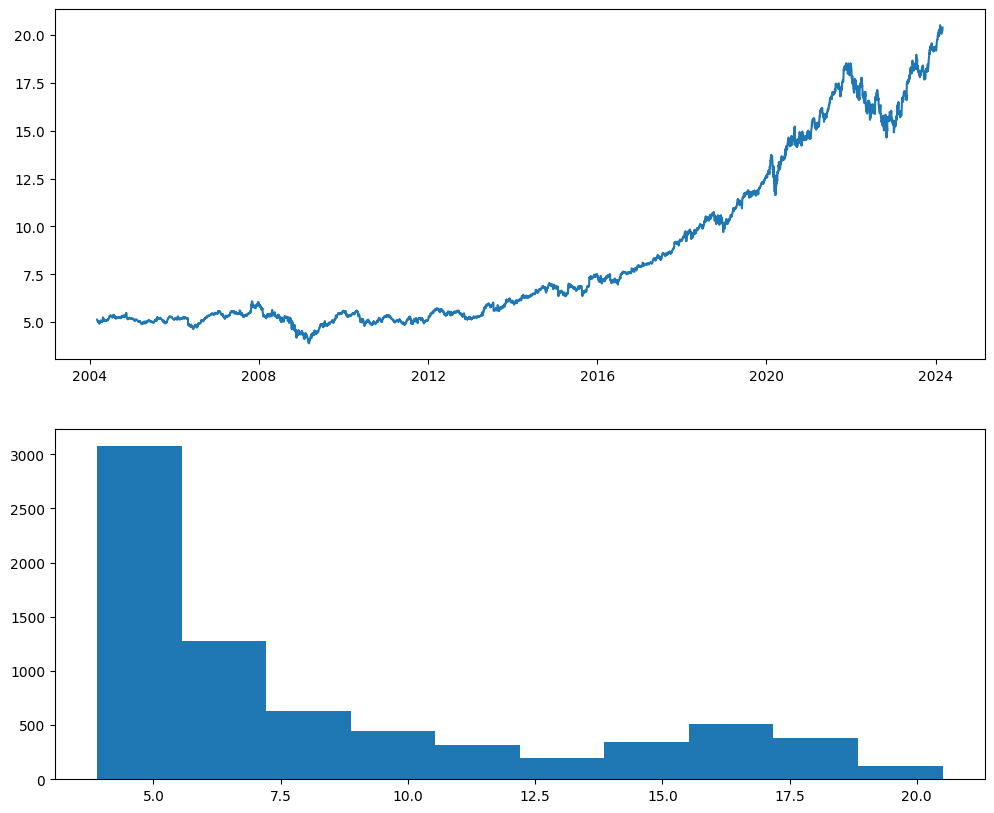

In [ ]:
square_root = dclose.copy()
square_root['Close'] = np.sqrt(square_root.Close)

#line chart
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Close'])

#Histogram
plt.subplot(212)
plt.hist(square_root['Close'])
plt.show()

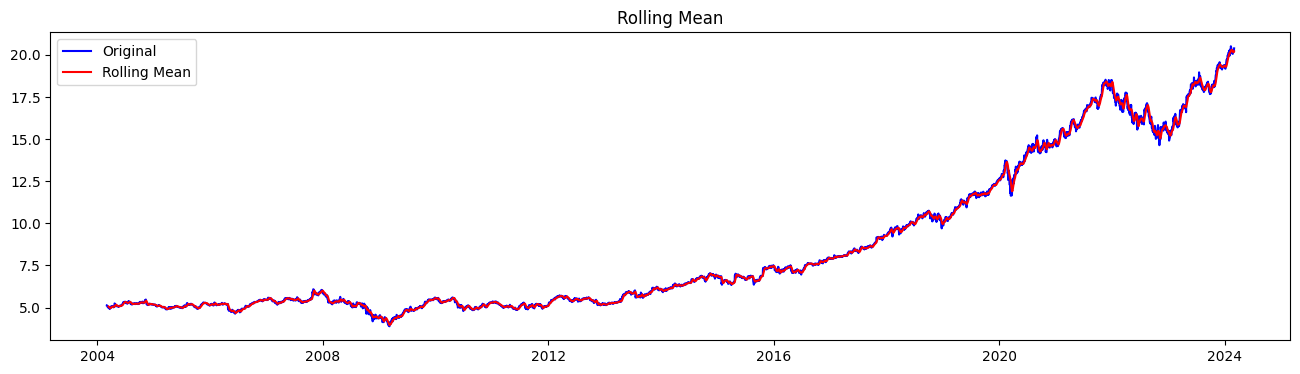

Results of Dickey Fuller Test:
Test Statistic                    2.539222
p_value                           0.999061
Lags Used                        21.000000
Number of Observations Used    7281.000000
Critical Value (1%)              -3.431248
Critical Value (5%)              -2.861937
Critical Value (10%)             -2.566981
dtype: float64


In [ ]:
test_stationarity(square_root)

In [ ]:
adf_test(square_root)

Fail to reject the null hypothesis
Date is non_stationary


# Log Transform

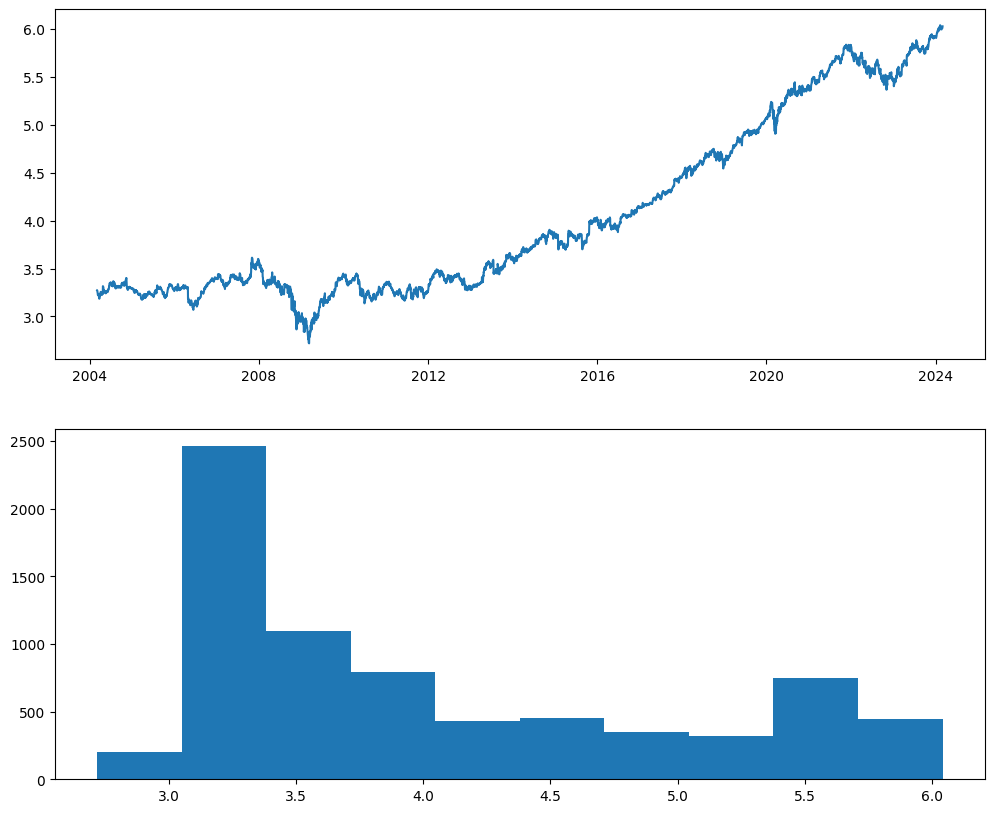

In [ ]:
log= dclose.copy()
log['Close'] = np.log(log.Close)

#line chart
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Close'])

#Histogram
plt.subplot(212)
plt.hist(log['Close'])
plt.show()

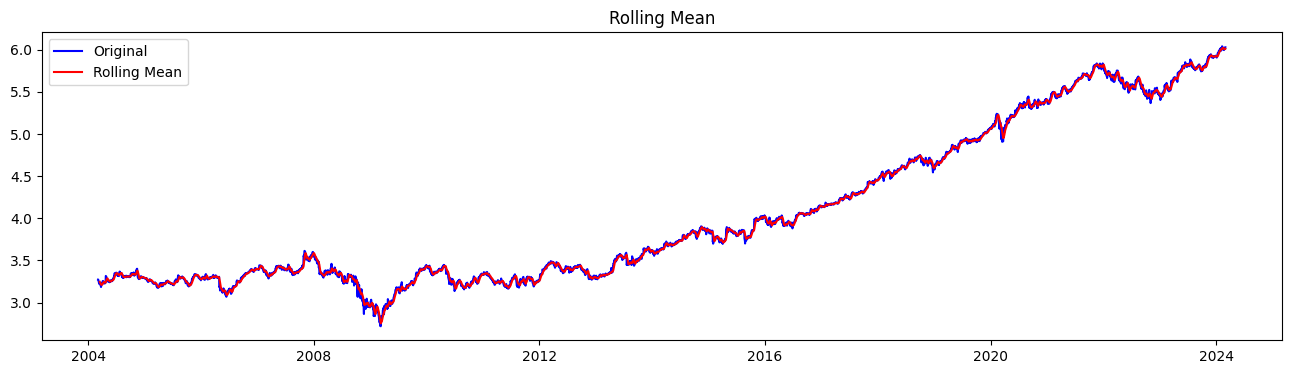

Results of Dickey Fuller Test:
Test Statistic                    1.339775
p_value                           0.996823
Lags Used                        10.000000
Number of Observations Used    7292.000000
Critical Value (1%)              -3.431247
Critical Value (5%)              -2.861936
Critical Value (10%)             -2.566981
dtype: float64


In [ ]:
test_stationarity(log)

In [ ]:
adf_test(log)

Fail to reject the null hypothesis
Date is non_stationary


### Converting Non_stationary Time Series into Stationary

### Differencing

In [ ]:
df2 = dclose.copy()

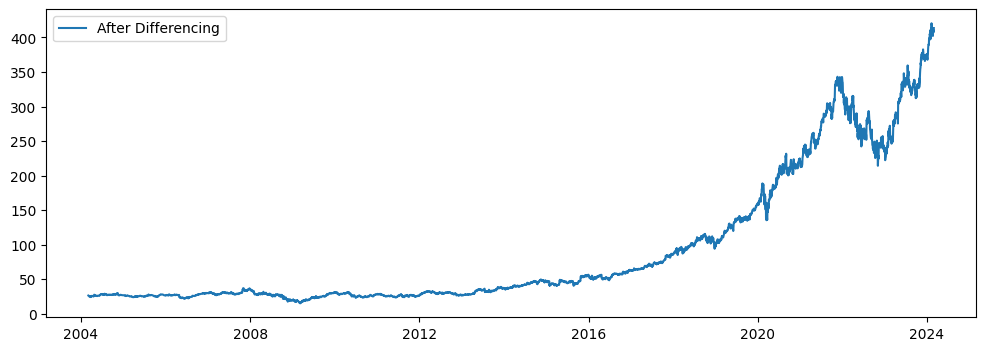

In [ ]:
differencing = df2 = df2.shift(1)


differencing.dropna(inplace=True)

plt.figure(figsize=(12,4))
plt.plot(differencing, label='After Differencing')
plt.legend(loc='best')
plt.show()

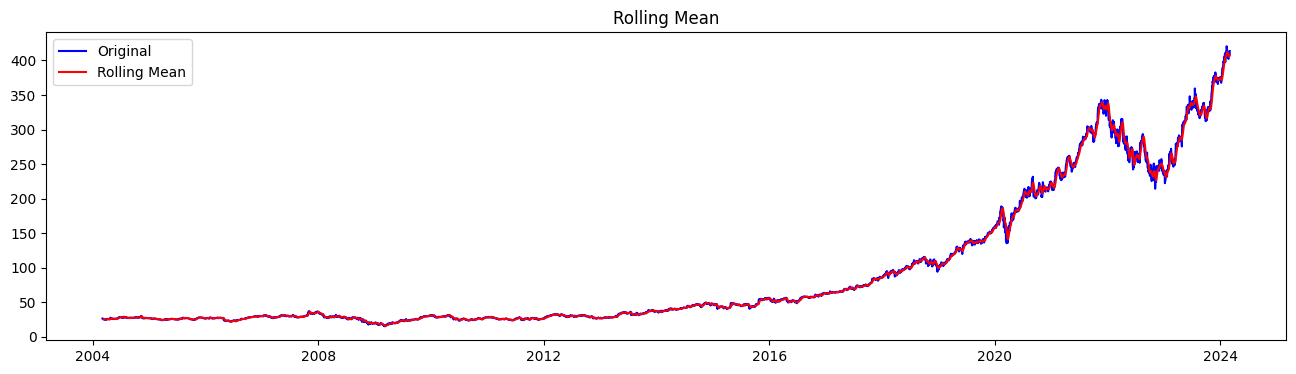

Results of Dickey Fuller Test:
Test Statistic                    3.253594
p_value                           1.000000
Lags Used                        27.000000
Number of Observations Used    7274.000000
Critical Value (1%)              -3.431249
Critical Value (5%)              -2.861937
Critical Value (10%)             -2.566982
dtype: float64


In [ ]:
test_stationarity(differencing)

In [ ]:
adf_test(differencing)

Fail to reject the null hypothesis
Date is non_stationary


### Seasonal Differencing

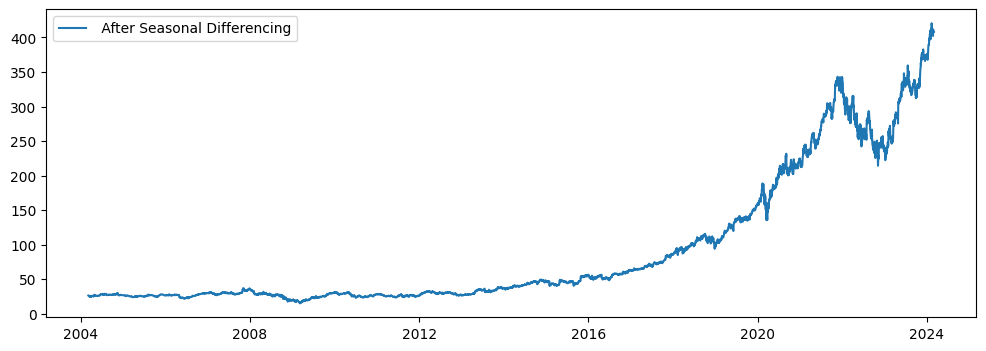

In [ ]:
seasonal_differencing = df2 = df2.shift(1)
seasonal_differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(seasonal_differencing, label=' After Seasonal Differencing')
plt.legend(loc='best')
plt.show()

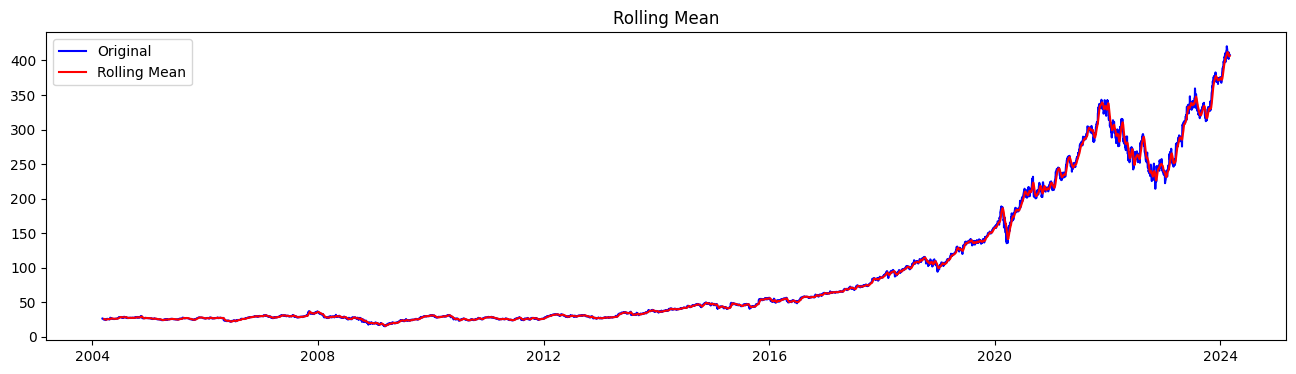

Results of Dickey Fuller Test:
Test Statistic                    3.130269
p_value                           1.000000
Lags Used                        27.000000
Number of Observations Used    7273.000000
Critical Value (1%)              -3.431249
Critical Value (5%)              -2.861937
Critical Value (10%)             -2.566982
dtype: float64


In [ ]:
test_stationarity(seasonal_differencing)

In [ ]:
adf_test(seasonal_differencing)

Fail to reject the null hypothesis
Date is non_stationary


### Box Cox Transformation

In [ ]:
from scipy.stats import boxcox

In [ ]:
data_boxcox = pd.DataFrame()
data_boxcox['Close'] = pd.Series(boxcox(df2['Close'], lmbda=0), df2.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(12,8),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(df2, label='original')
axis[1].set_title('Original')
plt.show()

In [ ]:
test_stationarity(data_boxcox)

In [ ]:
adf_test(data_boxcox)

### Differencing of the Box-Cox Transformation

In [ ]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

In [ ]:
test_stationarity(data_boxcox_diff)

In [ ]:
adf_test(data_boxcox_diff)

# Model Building

In [ ]:
!pip install pmdarima

### Importing librabries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
from math import floor,ceil,sqrt
import sys
import warnings
import datetime as dt
if not sys.warnoptions:
    warnings.simplefilter("ignore")

from sklearn.linear_model import LinearRegression
scaler = MinMaxScaler(feature_range=(0, 1))
from pmdarima.arima import auto_arima
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

### Apllying Different Methods

Here we will be applying different techniques to look which will be the best one to predict the future stock price.

### Moving Average

'Average' is easily one of the most common things we use in our day-to-day lives. For instance, calculating the average marks to determine overall performance, or finding the average temperature of the past few days to get an idea about today’s temperature – these all are routine tasks we do on a regular basis.
So this is a good starting point to use on our dataset for making predictions.

The predicted closing price for each day will be the average of a set of previously observed values. Instead of using the simple average, we will be using the moving average technique which uses the latest set of values for each prediction. In other words, for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set.

In [ ]:
def moving_avg_prediction(df):
    # Get the number of rows in the DataFrame
    shape = df.shape[0]

    # Extract the 'Close' column from the DataFrame
    df_new = df[['Close']]

    # Split the data into training and validation sets (75% training, 25% validation)
    train_set = df_new.iloc[:ceil(shape * 0.75)]
    valid_set = df_new.iloc[ceil(shape * 0.75):]

    # Print header for stock price prediction using moving average
    print('-----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------')
    print('-----------------------------------------------------------')

    # Print shapes of training and validation sets
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)

    # Calculate predictions using moving average
    preds = []
    for i in range(0, valid_set.shape[0]):
        # Calculate moving average
        a = train_set['Close'][len(train_set) - valid_set.shape[0] + i:].sum() + sum(preds)
        b = a / (valid_set.shape[0])
        preds.append(b)

    # Calculate root mean squared error (RMSE)
    rms = np.sqrt(np.mean(np.power((np.array(valid_set['Close']) - preds), 2)))

    # Print RMSE value on validation set
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')

    # Add 'Predictions' column to the validation set DataFrame
    valid_set['Predictions'] = preds

    # Plot the model training data, actual data, and predicted data
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Moving Averages', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])

    # Display the validation set DataFrame
    print(valid_set)

    # Show the plot
    plt.show()


In [ ]:
# Call the moving_avg_prediction function with the DataFrame 'df'
moving_avg_prediction(df)

### Linear Regression

The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.

In [ ]:
def linear_regression_prediction(df):
    # Get the number of rows in the DataFrame
    shape = df.shape[0]

    # Extract the 'Close' column from the DataFrame
    df_new = df[['Close']]

    # Split the data into training and validation sets (75% training, 25% validation)
    train_set = df_new.iloc[:ceil(shape * 0.75)]
    valid_set = df_new.iloc[ceil(shape * 0.75):]

    # Print header for stock price prediction using linear regression
    print('-----------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------')
    print('-----------------------------------------------------------------')

    # Print shapes of training and validation sets
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)

    # Reset index for training and validation sets
    train = train_set.reset_index()
    valid = valid_set.reset_index()

    # Convert dates to ordinal values
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]

    # Implement linear regression
    model = LinearRegression()
    model.fit(np.array(x_train).reshape(-1,1), y_train)
    preds = model.predict(np.array(x_valid).reshape(-1,1))

    # Calculate root mean squared error (RMSE)
    rms = np.sqrt(np.mean(np.power((np.array(valid_set['Close']) - preds), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')

    # Add 'Predictions' column to the validation set DataFrame
    valid_set['Predictions'] = preds

    # Plot the model training data, actual data, and predicted data
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Linear Regression', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])

    # Display the validation set DataFrame
    print(valid_set)

    # Show the plot
    plt.show()

In [ ]:
# Call the linear_regression_prediction function with the DataFrame 'df'
linear_regression_prediction(df)

## Auto ARIMA

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average.
ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:


1. p (past values used for forecasting the next value)
2. q (past forecast errors used to predict the future values)
3. d (order of differencing)

Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error.

##Long Short Term Memory (LSTM)

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not.

It has three gates:

Input gate: The input gate adds information to the cell state.
Forget gate: It removes the information that is no longer required by the model.
Output gate: Output Gate at LSTM selects the information to be shown as output.

In [ ]:
def lstm_prediction(df):
    # Get the number of rows in the DataFrame
    shape = df.shape[0]

    # Extract the 'Close' column from the DataFrame
    df_new = df[['Close']]

    # Convert DataFrame to numpy array
    dataset = df_new.values

    # Split the data into training and validation sets (75% training, 25% validation)
    train = df_new[:ceil(shape * 0.75)]
    valid = df_new[ceil(shape * 0.75):]

    # Print header for stock price prediction using LSTM
    print('-----------------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------')
    print('-----------------------------------------------------------------------------')

    # Print shapes of training and validation sets
    print('Shape of Training Set', train.shape)
    print('Shape of Validation Set', valid.shape)

    # Scale the data using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Prepare the training data
    x_train, y_train = [], []
    for i in range(40, len(train)):
        x_train.append(scaled_data[i-40:i, 0])
        y_train.append(scaled_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

    # Prepare the test data
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    X_test = []
    for i in range(40, inputs.shape[0]):
        X_test.append(inputs[i-40:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Make predictions
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)

    # Calculate root mean squared error (RMSE)
    rms = np.sqrt(np.mean(np.power((valid - closing_price), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')

    # Add 'Predictions' column to the validation set DataFrame
    valid['Predictions'] = closing_price

    # Plot the model training data, actual data, and predicted data
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])

    # Display the validation set DataFrame
    print(valid)

    # Show the plot
    plt.show()

    # Return the trained LSTM model
    return model

In [ ]:
# Cprediction(df)all the lstm_prediction function with the DataFrame 'df'
mod=lstm_prediction(df)

Observation

Based on the plotted graphs and RMSE (Root Mean Squared Error) values, the LSTM (Long Short Term Memory) model appears to be the most effective technique for predicting the future stock price of MSFT stock.

Save the model

In [ ]:
import pickle
with open('Lstm_Model.pkl', 'wb') as f:
  pickle.dump(mod, f)

In [ ]:
#load the model from the file
with open('Lstm_Model.pkl', rb) as f:
  loaded_model = pickle.load(f)

In [ ]:
seq_len = 2 #Length of the seq for the LSTM

Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]

In [ ]:
# prepare model
modelLSTM_tuned=LSTM(endog=Y_train,exog=X_train_LSTM,order=[2,0,1])
model_fit_tuned = modelLSTM_tuned.fit()

In [ ]:

# estimate accuracy on validation set
predicted_tuned = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_LSTM)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

In [ ]:
def evaluate_arima_model(arima_order):
    #predicted = list()
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))

# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)

In [ ]:
# Save Model Using Pickle
from pickle import dump
from pickle import load

# save the model to disk
filename = 'finalized_model.sav'
dump(model_fit_tuned, open(filename, 'wb'))